# __LONDON BOROUGHS AND THEIR FACILITIES__

# Notebook Instructions

Although most of the plots are displayed in the notebook, the output of the interactive plots is not shown. For this reason, an html file of the notebook (the axes and legends are misplaced when submitting it to Github) and a folder called 'Interactive Plots' with the ordered images of the interactive plots are also provided in order to visualize these plots. To identify these plots in the notebook, an (*) will appear in the parts where an interactive plot should be displayed.

Moreover, after the scraping and cleaning process the data is stored in the files 'Table1.csv' and 'Table2.csv' for convenience. These files are also uploaded.

In [1]:
from PIL import Image
import pandas as pd 
import requests
from bs4 import BeautifulSoup 
import os
import json
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
import geopandas
import plotly.graph_objects as go
import plotly.express as px 
from scipy import stats
import geopandas
from plotly.subplots import make_subplots

# Introduction

"When a man is tired of London, he is tired of life; for there is in London all that life can afford" (Samuel Johnson,1777). London, one of the largest cities in the world, composed of 32 boroughs and the City of London, can offer a genuine quality of life to the people living in each of these boroughs. The urban planning of services or facilities accessible to citizens clearly improves their quality of life. This study shows that certain boroughs are under-resourced and it is important to promote the territorial rebalancing of these services or facilities. The usefulness of this work is to present the existing services and facilities each borough has, allowing investors and the public administration to increase the under-supplied services.

What will happen to London in the future, and does it have the potential for orderly and equitable development between the different boroughs?

This paper attempts to analyse, based on a series of socio-economic characteristics of each borough (population, area, population density, employment rate, average income per employee, average self-employed income, etc.), their level of facilities (schools, restaurants, shops, attractions etc.) development.

From here, by the comparison between boroughs with the same socio-economic characteristics and knowing the facilities that each one has, we analyse if it is possible any potential growth of the underprovided type of facility in certain boroughs. This study can be useful:

  - To private investors who want to set up a shop, a restaurant, a school, a cinema, etc., it will allow them to know where they have a greater probability of success, locating it in the borough that is underprovided in such a service or facility. In addition, they have the information that in a borough with similar characteristics and with a greater number of services of that type, the business has worked.
  
  
  - For a future resident in London or someone who is moving to London, so that they can have information of which borough has the facilities they need most. A young person may need schools, shops nearby, and leisure venues and hence, will choose the borough that has these facilities. An older person, may prefer nearby theatres, restaurants and shops.
  
  
  - Public administrations can also use this information to invest in public facilities in those boroughs where there are under-supplied services, compared to other boroughs with similar characteristics.

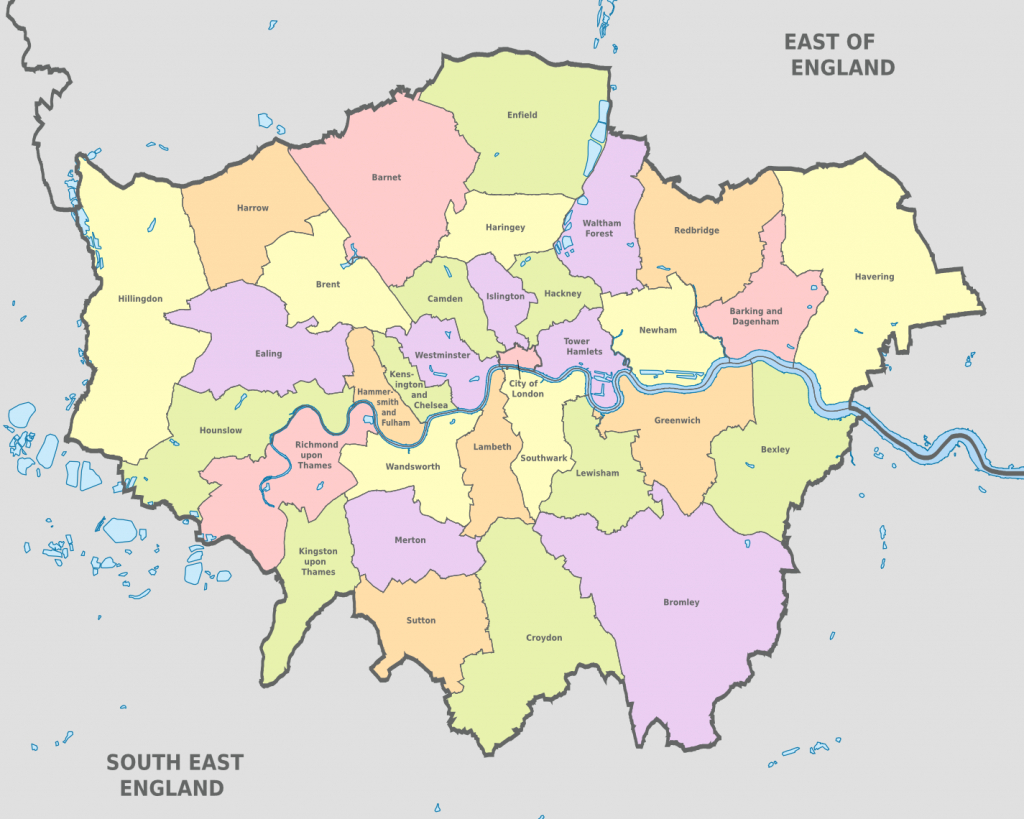

In [12]:
Image.open("London boroughs.png")

# Research Questions 

- Do borough with the same socio-economic characteristics have a similar level of facilities and services?


- In which boroughs sharing the same socio-economic characteristics can potentialities for the development of new services or facilities be seen?

# Data Acquisition

The data used in this analysis is taken from different sources and divided in two tables:

- __Table I__: it is the combination of the socio-economic characteristics of the boroughs most of which are obtained through web scraping and the rest through excel. The characteristics of population, area , density of population, workday population (employee and self-employed), day overseas staying visitors, day domestic staying visitors, day trip visitors, average public accesibility score, average employee and self-employed income, percentage of population for different age groups, crime rate (per 1000 residents), employment rate, average housing price and percentage annual change of housing price, are obtained for each borough.



- __Table II__: contains the facilities of the boroughs, obtained through the procedures of web scraping and API. This table will describe the number of restaurants, shops, attractions, clubs, leisure venues, primary schools, secondary schools, mainstream schools, independent schools, nursery schools, infant schools, academy schools, pharmacies, hotels and cinemas/theatres (as these were not included in the leisure venues count), in each borough.

In this study, we have tried to get the most recent data but, unfortunately, this is not an easy task as the most updated data is not always available and also to obtain the desired variables many sources are used and might contain information from different years. However, from this point onwards, the data is assumed to be true.

## Table I:  Socio-Economic Characteristics of the Boroughs

As stated above, __Table I__ comprises the socio-economic characteristics of the boroughs. These characteristics are obtained using the following methods:

1. __Excel__: the variables are acquired from 'daytime-population-boroughs'(Sheet 2014) and 'london-borough-profiles'(Sheet Data) and can be found in the following links:
    - https://data.london.gov.uk/dataset/daytime-population-borough ('Workday population (employee)', 'Workday population (self-employed)', 'Day Overseas Staying visitors', 'Day Domestic Staying Visitors' and 'Day Trip Visitors')
    
    - https://data.london.gov.uk/dataset/london-borough-profiles ('Average Public Transport Accesibility Score')



2. __Web Scraping__: the variables are obtained from the following web pages:
   - https://www.mylondon.news/news/zone-1-news/londons-richest-boroughs-average-income-18114728 ('Average Employee Income', 'Average Self-Employee Income')
   - https://en.wikipedia.org/wiki/London_boroughs ('Population', 'Area', 'Density')
   - https://www.londoncouncils.gov.uk/services/london-european-partnership-transport-lept/about-lept/london-boroughs ('Percentage of population 75+', 'Percentage of pulation 16-74', 'Percentage of population 16-)
   - https://www.citypopulation.de/en/uk/london/ ('Percentage of population 75+', 'Percentage of population 16-74', 'Percentage of population 16-)
   - https://www.finder.com/uk/london-crime-statistics ('Crime Rate (per 1000)')
   - https://crimerate.co.uk/london/city-of-london ('Crime Rate (per 1000)')
   - https://www.gmblondon.org.uk/news/16-boroughs-in-london-have-employment-rate-below-uk-average.html ('Employment Rate')
   - https://www.gov.uk/government/statistics/uk-house-price-index-england-april-2021/uk-house-price-index-england-april-2021 ('Average Housing Price', 'Percentage Annual Change Housing Price')

### Excel

From the excel __'daytime-population-boroughs' (Sheet: 2014)__, which contains information about the population of the boroughs during the day, only the characteristics of 'Workday population (employee)', 'Workday population (self-employed)', 'Day Overseas Staying visitors', 'Day Domestic Staying Visitors' and 'Day Trip Visitors' are selected for the study. Our main interest is focused in employees and tourists as they are the ones that could be expending, as the unemployed and the children might not have the capacity to spend. 

Moreover, the __'london-borough-profiles' (Sheet: Data)__ provides numerous detail on the characteristics of the boroughs, however, only the variable 'Transport Accesibility Score' is added to __Table I__ as the rest of the characteristics are obtained through web scraping. 

After obtaining the desired variables from these two data bases, a data frame is created for each of them. These data frames are subsequently merged together in a new one called __Excel__.

In [39]:
# DAY POPULATION:

excel1 = pd.read_excel ('daytime-population-borough.xls', sheet_name='2014')
excel1= excel1.loc[:,['Unnamed: 1', 'Components', 'Unnamed: 5', 'Unnamed: 9','Unnamed: 10','Unnamed: 11']]

# Now let us change the name of the columns:
excel1 = excel1.rename(columns={'Unnamed: 1': 'Boroughs',
                        'Components': 'Workday population (employee)',
                        'Unnamed: 5':'Workday population (self-employed)',
                        'Unnamed: 9':'Day Overseas Staying visitors',
                        'Unnamed: 10':'Day Domestic Staying Visitors',
                        'Unnamed: 11':'Day Trip Visitors'})

# Now we just want the rows from 2 to 34 included:
excel1=excel1[2:35]
excel1=excel1.set_index('Boroughs')
excel1.head()

Workday population (employee)  \
Boroughs                                             
City of London                              330622   
Barking and Dagenham                         41039   
Barnet                                      101609   
Bexley                                       56038   
Brent                                        92297   

                     Workday population (self-employed)  \
Boroughs                                                  
City of London                                    95692   
Barking and Dagenham                               8446   
Barnet                                            41075   
Bexley                                            12394   
Brent                                             18319   

                     Day Overseas Staying visitors  \
Boroughs                                             
City of London                                7588   
Barking and Dagenham                          1674   
Barnet                                        5522   
Bexley                                        3099   
Brent                                         4453   

                     Day Domestic Staying Visitors Day Trip Visitors  
Boroughs                                                              
City of London                               16559             97572  
Barking and Dagenham                           833             11235  
Barnet                                        1321             18066  
Bexley                                         778             12867  
Brent                                         1258             13252

In [41]:
# AVERAGE PUBLIC TRANSPORT ACCESIBILITY SCORE:

excel2 = pd.read_excel ('london-borough-profiles.xlsx', sheet_name='Data')
excel2= excel2.loc[:,['Area name','Average Public Transport Accessibility score, 2014']]
# Now let us change the name of the columns:
excel2 = excel2.rename(columns={'Average Public Transport Accessibility score, 2014': 'Average Public Transport Accessibility score',
                        'Area name':'Boroughs'})
# Now we just want the rows from 1 to 33 included:
excel2=excel2[1:34]
excel2=excel2.set_index('Boroughs')
excel2.head()

Average Public Transport Accessibility score
Boroughs                                                         
City of London                                           7.862302
Barking and Dagenham                                     2.970626
Barnet                                                   2.996701
Bexley                                                   2.552134
Brent                                                    3.653713

In [42]:
Excel=excel1.join(excel2)
Excel.head()

Workday population (employee)  \
Boroughs                                             
City of London                              330622   
Barking and Dagenham                         41039   
Barnet                                      101609   
Bexley                                       56038   
Brent                                        92297   

                     Workday population (self-employed)  \
Boroughs                                                  
City of London                                    95692   
Barking and Dagenham                               8446   
Barnet                                            41075   
Bexley                                            12394   
Brent                                             18319   

                     Day Overseas Staying visitors  \
Boroughs                                             
City of London                                7588   
Barking and Dagenham                          1674   
Barnet                                        5522   
Bexley                                        3099   
Brent                                         4453   

                     Day Domestic Staying Visitors Day Trip Visitors  \
Boroughs                                                               
City of London                               16559             97572   
Barking and Dagenham                           833             11235   
Barnet                                        1321             18066   
Bexley                                         778             12867   
Brent                                         1258             13252   

                     Average Public Transport Accessibility score  
Boroughs                                                           
City of London                                           7.862302  
Barking and Dagenham                                     2.970626  
Barnet                                                   2.996701  
Bexley                                                   2.552134  
Brent                                                    3.653713

### Web Scraping

By applying the method of web scraping, the variables 'Average Employee Income', 'Average Self-Employee Income', 'Population', 'Area', 'Density', 'Percentage of population 75+', 'Percentage of pulation 16-74', 'Percentage of population 16-', 'Crime Rate (per 1000)', 'Employment Rate', 'Average Housing Price' and 'Percentage Annual Change Housing Price' are obtained. After acquiring each of them, they are stored in a data frame and merged together in a new one called __Data_web_scraping__. 

The only thing to mention is that when obtaining the variables 'Percentage of population 75+', 'Percentage of pulation 16-74' and 'Percentage of population 16-, two web pages are used as the information for some of the boroughs is missing in the first one. Similarly, when acquiring the 'Crime Rate' variable, the entry for City of London is missing and it is scraped from a different source.

In [43]:
res=requests.get("https://www.mylondon.news/news/zone-1-news/londons-richest-boroughs-average-income-18114728")
soup=BeautifulSoup(res.content,"lxml")

lists=soup.find_all('tr')
rank=[]
Boroughs=[]
employees=[]
self_employed=[]

for names in lists[1:-1]:
    names=names.text.split("£")
    rank.append(names[0].split(" ",2)[1])
    Boroughs.append(names[0].split(" ",2)[2])
    employees.append(names[1])
    self_employed.append(names[2])

Boroughs=[x.strip(' ') for x in Boroughs]
employees=[x.split(',')[0]+x.split(',')[1] for x in employees]
self_employed=[x.split(',')[0]+x.split(',')[1] for x in self_employed]
Boroughs[Boroughs.index('Kingston-upon-Thames')]='Kingston upon Thames'
Boroughs[Boroughs.index('Richmond-upon-Thames')]='Richmond upon Thames'

df1=pd.DataFrame({'Average Employee Income':employees,'Average Self-Employee Income':self_employed},index=Boroughs)
df1.head()

Average Employee Income Average Self-Employee Income
Brent                                 22800                        16700 
Barking and Dagenham                  23500                        18100 
Newham                                24000                        16500 
Harrow                                24500                        17300 
Hounslow                              24800                        16500

In [44]:
res=requests.get("https://en.wikipedia.org/wiki/London_boroughs")
soup=BeautifulSoup(res.content,"lxml")

table=soup.find_all('table')[1]
lists=table.find_all('li')
Boroughs=[]
Area=[]
Population=[]
Density=[]



for li in lists:
    Boroughs.append(li.text)
    try:
        links = li.find('a').get('href')
        res= requests.get('https://en.wikipedia.org'+links)
        soup = BeautifulSoup(res.content,'lxml')
        ar=soup.find(text="Area")
        if ar is None:
            Area.append("NA")
        else:
            if li==lists[0]:
                Area.append(ar.findNext('td').text.split("\xa0sq\xa0mi")[0].split("\xa0km2")[0])
            else:
                Area.append(ar.findNext('td').text.split("\xa0sq\xa0mi")[1].split("\xa0km2")[0].split('(')[1])
        pop=soup.find(text="Population")
        if pop is None:
            Population.append('NA')
        else:
            Population.append(pop.findNext('td').text.split("(")[0])
        den=soup.find(text='Population').findNext('tr').findNext('tr').findNext('tr')
        if den is None:
            Density.append('NA')
        else:
            Density.append(den.findNext('td').text.split("(")[1].split("/")[0])
    except:
        Area.append('NA')
        Population.append('NA')
        Density.append('NA')
        
Boroughs[0]="City of London"
Boroughs[1]="Westminster"


Area.pop(1)
Population.pop(1)

# Applying the Wikipedia criterion of the Density rounding to 2 significant figures, we compute population density for City 
# of London: 
Density_City_london=str(int(round(float(Population[0].split(",")[0]+Population[0].split(",")[1])/float(Area[0]),-2)))

Population=[x.split(',')[0]+x.split(',')[1] for x in Population]
Density=[x.split(',')[0]+x.split(',')[1] for x in Density[1:]]
Density.insert(0, Density_City_london)

df2=pd.DataFrame({'Area':Area,'Population':Population,'Density':Density},index=Boroughs)
df2.head()

Area Population Density
City of London           2.90      9401     3200
Westminster             21.48     261317   12000
Kensington and Chelsea  12.13     156129   13000
Hammersmith and Fulham  16.40     185143   11000
Wandsworth              34.26     329677    9600

In [82]:
res=requests.get("https://www.londoncouncils.gov.uk/services/london-european-partnership-transport-lept/about-lept/london-boroughs")  
soup=BeautifulSoup(res.content,"lxml")


Boroughs=[]
over_75=[]
between_16and74=[]
under_16=[]


bor = soup.find_all('h3')
for b in bor[:-1]:
    spl=b.text.split(" ")
    if len(spl)==2:
        if spl[1]!='demographics' and spl[0]!='Demographics':
            Boroughs.append(b.text)
    else:
        if spl[0]!='Demographics':
            Boroughs.append(b.text)

char=soup.find_all('div',{'class':"field-content acc-text"})
for c in char:
    try:
        if c==char[0]:
            age=c.find_all('p')[4].text
            over_75.append(age.split(":")[1].split("%")[0])
            between_16and74.append(age.split(",")[1].split("%")[0])
            under_16.append(age.split(",",2)[2].split("%",3)[0])
        
        elif c==char[29]:
            age=c.find_all('p')[2].text
            over_75.append(age.split(":")[1].split("%")[0])
            between_16and74.append(age.split(",")[1].split("%")[0])
            under_16.append(age.split(",",2)[2].split("%")[0].split('\n')[1])

        else:
            age=c.find_all('p')[3].text
            over_75.append(age.split(":")[1].split("%")[0])
            between_16and74.append(age.split(",")[1].split("%")[0])
            under_16.append(age.split(",",2)[2].split("%")[0])
            
    except:            
        over_75.append('NA')
        between_16and74.append('NA')
        under_16.append('NA')

        
# Wandsworth and Brent, this data is taking from the same census of 2011 so should not be too bad
links=["wards/E09000003__barnet/","wards/E09000032__wandsworth/","admin/enfield/E43000200__enfield/"]
remaining=["Barnet", "Wandsworth","Enfield"]
for i in range(0,3):
    res=requests.get("https://www.citypopulation.de/en/uk/london/" +links[i])  
    soup=BeautifulSoup(res.content,"lxml")
    
    # AGE:
    above75=soup.find_all('table')[2].text.split()[9].split('years')[1]
    between16_74=soup.find_all('table')[2].text.split()[7].split('years')[1]
    under16=soup.find_all('table')[2].text.split()[5].split('years')[1]
    
    number75=int(above75.split(',')[0]+above75.split(',')[1])
    number16_74=int(between16_74.split(',')[0]+between16_74.split(',')[1])
    number16=int(under16.split(',')[0]+under16.split(',')[1])
    total=number75+number16_74+number16
    
    over_75[Boroughs.index(remaining[i])]=str(round(number75*100/total,1))
    between_16and74[Boroughs.index(remaining[i])]=str(round(number16_74*100/total,1))
    under_16[Boroughs.index(remaining[i])]=str(round(number16*100/total,1))


Boroughs[Boroughs.index('Kingston')]='Kingston upon Thames'
Boroughs[Boroughs.index('Richmond')]='Richmond upon Thames'

df3=pd.DataFrame({'Percentage of population 75+':over_75,
                  'Percentage of population 16-74':between_16and74,
                  'Percentage of population 16-':under_16,
                 },
                 index=Boroughs)
df3.head()

Percentage of population 75+  \
Barking and Dagenham                          7.3   
Barnet                                       14.6   
Bexley                                        7.4   
Brent                                         4.7   
Bromley                                         8   

                     Percentage of population 16-74  \
Barking and Dagenham                           69.3   
Barnet                                         61.7   
Bexley                                         71.5   
Brent                                          75.5   
Bromley                                          72   

                     Percentage of population 16-  
Barking and Dagenham                         23.4  
Barnet                                       23.7  
Bexley                                       21.1  
Brent                                        19.8  
Bromley                                        20

In [46]:
res=requests.get("https://www.finder.com/uk/london-crime-statistics")  
soup=BeautifulSoup(res.content,"lxml")

table=soup.find_all('table')[1]#{'class':'luna-table__body'})
row=table.find_all('td')

Boroughs=[]
Crime_Rate=[] # Crime rate per 1000

i=1
for r in row:
    if i==1:
        Boroughs.append(r.text)
        i=2
    elif i==2:
        i=3
    elif i==3:
        Crime_Rate.append(r.text.split('per')[0])
        i=1
        
res=requests.get("https://crimerate.co.uk/london/city-of-london")  
soup=BeautifulSoup(res.content,"lxml")

city_crime=soup.find_all("p")[1]
Crime_Rate.append(city_crime.text.split('was')[1].split('crimes')[0])
Boroughs.append('City of London')


df4=pd.DataFrame({'Crime Rate (per 1000)':Crime_Rate},index=Boroughs)
df4.head()

Crime Rate (per 1000)
Barking and Dagenham                 99.5 
Barnet                               80.6 
Bexley                               73.8 
Brent                                96.2 
Bromley                              77.6

In [48]:
# Employment rate aged 16-64:

res=requests.get("https://www.gmblondon.org.uk/news/16-boroughs-in-london-have-employment-rate-below-uk-average.html")  
soup=BeautifulSoup(res.content,"lxml")

Boroughs=[]
Employment_Rate=[]

table=soup.find('tbody')
row=table.find_all('tr')
for r in row[9:]:
    info=r.find_all('p')
    Boroughs.append(info[1].text)
    Employment_Rate.append(info[3].text)
    
df5=pd.DataFrame({'Employment Rate':Employment_Rate},index=Boroughs)
df5.head()

Employment Rate
Sutton                    82.4
City of London            82.1
Lambeth                   81.9
Wandsworth                80.3
Bromley                   79.0

In [49]:
### Average house price 2021, average house price 2020 and percentage annual change:
res=requests.get("https://www.gov.uk/government/statistics/uk-house-price-index-england-april-2021/uk-house-price-index-england-april-2021")
soup=BeautifulSoup(res.content,"lxml")

Borough=[]
Average_Housing_Price_2021=[]
Average_Housing_Price_2020=[]
Percentage_Annual_Change_Housing_Price=[]

table=soup.find_all('tbody')[1]
row=table.find_all('tr')
for r in row:
    Borough.append(r.find('th').text)
    info=r.find_all('td')
    Average_Housing_Price_2021.append(info[0].text.split('£')[1])
    Average_Housing_Price_2020.append(info[1].text.split('£')[1])
    Percentage_Annual_Change_Housing_Price.append(info[2].text.split('%')[0])
    

Average_Housing_Price_2021=[x.split(',')[0]+x.split(',')[1] for x in Average_Housing_Price_2021]

df6=pd.DataFrame({'Average Housing Price':Average_Housing_Price_2021, 
                  'Percentage Annual Change Housing Price':Percentage_Annual_Change_Housing_Price},
                 index=Boroughs)

df6.head()

Average Housing Price Percentage Annual Change Housing Price
Sutton                        312288                                    7.1
City of London                544682                                    2.6
Lambeth                       358959                                    4.9
Wandsworth                    479010                                    1.6
Bromley                       456681                                    5.5

In [83]:
Data_web_scraping=df1.join(df2).join(df3).join(df4).join(df5).join(df6)
Data_web_scraping.head()

Average Employee Income Average Self-Employee Income  \
Brent                                 22800                        16700    
Barking and Dagenham                  23500                        18100    
Newham                                24000                        16500    
Harrow                                24500                        17300    
Hounslow                              24800                        16500    

                       Area Population Density Percentage of population 75+  \
Brent                 43.24     329771    7600                          4.7   
Barking and Dagenham  36.09     212906    5900                          7.3   
Newham                36.22     353134    9700                            4   
Harrow                50.47     251160    5000                          7.1   
Hounslow              55.98     271523    4900                            5   

                     Percentage of population 16-74  \
Brent                                          75.5   
Barking and Dagenham                           69.3   
Newham                                         69.8   
Harrow                                         72.7   
Hounslow                                         74   

                     Percentage of population 16- Crime Rate (per 1000)  \
Brent                                        19.8                 96.2    
Barking and Dagenham                         23.4                 99.5    
Newham                                       26.2                105.1    
Harrow                                       20.2                 71.3    
Hounslow                                       21                102.8    

                     Employment Rate Average Housing Price  \
Brent                           67.5                402550   
Barking and Dagenham            65.8                473355   
Newham                          68.7                696476   
Harrow                          73.5                432341   
Hounslow                        71.5                545179   

                     Percentage Annual Change Housing Price  
Brent                                                   6.8  
Barking and Dagenham                                    1.2  
Newham                                                  3.7  
Harrow                                                  7.5  
Hounslow                                                7.2

### Table I after Data Acquisition

In order to obtain __Table I__, the data frames __Excel__ and __Data_web_scraping__ are merged.

In [84]:
Table1=Excel.join(Data_web_scraping)
display(Table1)

Workday population (employee)  \
Boroughs                                               
City of London                                330622   
Barking and Dagenham                           41039   
Barnet                                        101609   
Bexley                                         56038   
Brent                                          92297   
Bromley                                        84963   
Camden                                        278046   
Croydon                                        94852   
Ealing                                        106966   
Enfield                                        81996   
Greenwich                                      60652   
Hackney                                        84468   
Hammersmith and Fulham                        105730   
Haringey                                       56120   
Harrow                                         59169   
Havering                                       63784   
Hillingdon                                    166382   
Hounslow                                      115536   
Islington                                     171739   
Kensington and Chelsea                        100703   
Kingston upon Thames                           58592   
Lambeth                                       121058   
Lewisham                                       53153   
Merton                                         64773   
Newham                                         77464   
Redbridge                                      61312   
Richmond upon Thames                           62795   
Southwark                                     173469   
Sutton                                         56779   
Tower Hamlets                                 211542   
Waltham Forest                                 58263   
Wandsworth                                     92545   
Westminster                                   555514   

                       Workday population (self-employed)  \
Boroughs                                                    
City of London                                      95692   
Barking and Dagenham                                 8446   
Barnet                                              41075   
Bexley                                              12394   
Brent                                               18319   
Bromley                                             23014   
Camden                                              38200   
Croydon                                             25663   
Ealing                                              27768   
Enfield                                             27213   
Greenwich                                           19273   
Hackney                                             26868   
Hammersmith and Fulham                              17835   
Haringey                                            20765   
Harrow                                              16803   
Havering                                            12610   
Hillingdon                                          16723   
Hounslow                                            24359   
Islington                                           20094   
Kensington and Chelsea                              17628   
Kingston upon Thames                                10666   
Lambeth                                             31747   
Lewisham                                            21755   
Merton                                              17643   
Newham                                              16559   
Redbridge                                           13782   
Richmond upon Thames                                16112   
Southwark                                           68530   
Sutton                                               8642   
Tower Hamlets                                       21519   
Waltham Forest                                      12743   
Wandsworth                                       

## Table II: Facilities of the Boroughs

In this case, __Table II__ contains the number of different types of facilities for each of the boroughs. These features are acquired using the following methods:

- __Web Scraping__: the variables are obtained from the following links:

    - http://www.londontown.com/LondonStreets/ ('Restaurants', 'Shops', 'Attractions', 'Clubs', 'Leisure Venues')
    
    - https://www.londoncouncils.gov.uk/services/london-european-partnership-transport-lept/about-lept/london-boroughs ('Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools', 'Academy Schools')
    - https://en.wikipedia.org/wiki/London_Borough_of_Barnet ('Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools', 'Academy Schools')
    
    - https://www.compare-school-performance.service.gov.uk/schools-by-type?step=default&table=schools&region=308&geographic=la&for=primary ('Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools', 'Academy Schools')
    
    - https://www.compare-school-performance.service.gov.uk/schools-by-type?step=default&table=schools&region=212&geographic=la&for=primary ('Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools', 'Academy Schools')
    
    
- __API__: the variables 'Number of Pharmacies', 'Number of Hotels' and 'Number of Cinemas/Theatres' are obtained from the Foursquare API.
   

### Web Scraping

The variables 'Restaurants', 'Shops', 'Attractions', 'Clubs' and 'Leisure Venues' are scraped from the same webpage (stated above) and stored in a dataframe. While the characteristics 'Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools' and 'Academy Schools', are obtained from different sources (since the main one does not contain the information for some of the boroughs) and merged together in another data frame. Furthermore, for some cases the data is written in words instead of numbers, so an extra function is created in order to convert these words into their respective numbers. Finally, the two data frames are merged together in a new one called __web_scraping2__.

In [52]:
res=requests.get("http://www.londontown.com/LondonStreets/")  
soup=BeautifulSoup(res.content,"lxml")

names=soup.find_all('a', {'class':'heading-link'})

Boroughs=[]
Restaurants=[]
Shops=[]
Attractions=[]
Clubs=[]
Leisure_Venues=[]
char=[Restaurants,Shops,Attractions,Clubs,Leisure_Venues]

for n in names:
    Boroughs.append(n.text)
    links=n.get('href')
    try:
        res=requests.get("http://www.londontown.com"+links)
        soup = BeautifulSoup(res.content,'lxml')    
        p=soup.find('p', {'class':'dark-grey-text padding-top-12 padding-bottom-10'}).find_all('a')
        if len(p)==5:
            for i in range(0,5):
                char[i].append(p[i].text.split(" ")[0])
        elif len(p)==4:
            for i in range(0,3):
                char[i].append(p[i].text.split(" ")[0])
            char[3].append("0")
            char[4].append(p[3].text.split(" ")[0])

        else:
            for i in range(0,5):
                char[i].append("NA")
    
    except:
        for i in range(0,5):
            char[i].append("NA")
            
Boroughs[Boroughs.index("City of Westminster")]="Westminster"
Boroughs[Boroughs.index('Kingston-Upon-Thames')]='Kingston upon Thames'
Boroughs[Boroughs.index('Richmond-upon-Thames')]='Richmond upon Thames'

df7=pd.DataFrame({'Restaurants': Restaurants,'Shops':Shops, 'Attractions':Attractions,'Clubs':Clubs,'Leisure Venues':Leisure_Venues},index=Boroughs)
df7.head()

Restaurants Shops Attractions Clubs Leisure Venues
Barking and Dagenham          17     8           6     0             16
Barnet                       300   300          42    43            107
Bexley                        14     1          12     0             18
Brent                       1963  1495         329   485            503
Bromley                       99    31          30     9             53

In [53]:
res=requests.get("https://www.londoncouncils.gov.uk/services/london-european-partnership-transport-lept/about-lept/london-boroughs")  
soup=BeautifulSoup(res.content,"lxml")

Boroughs=[]
Primary=[]
Secondary=[]
Mainstream=[]
Independent=[]
Nursery=[]
Infant=[]
Academy=[]

bor = soup.find_all('h3')
for b in bor[:-1]:
    spl=b.text.split(" ")
    if len(spl)==2:
        if spl[1]!='demographics' and spl[0]!='Demographics':
            Boroughs.append(b.text)
    else:
        if spl[0]!='Demographics':
            Boroughs.append(b.text)

            
            
char=soup.find_all('div',{'class':"field-content acc-text"})
for c in char:
    try:
        if c==char[0]: # Barking and Dagenham, special case as want 'p'[7] instead of 'p'[6]
            school=c.find_all('p')[7].text
            Primary.append(school.split(":")[1].split("Primary")[0])
            Secondary.append(school.split(",")[1].split("Secondary")[0])
            Mainstream.append(school.split(",",2)[2].split("non")[0])
            Independent.append("0")
            Nursery.append("0")
            Infant.append("0")
            Academy.append("0")

        
        elif c==char[29]: # Tower Hamlets special case as want 'p'[4] instead of 'p'[6]
            school=c.find_all('p')[4].text
            Nursery.append(school.split(":")[1].split("Nursery")[0])
            Infant.append(school.split(",")[1].split("Infant")[0])
            Primary.append(school.split(",",2)[2].split("Primary")[0])
            Secondary.append(school.split(",",3)[3].split("Secondary")[0])
            Independent.append(school.split(",",4)[4].split("Independent")[0])
            Mainstream.append("0")
            Academy.append("0")
 
        else:  # The rest want 'p'[6]
            #school=c.find_all('p')[6].text
            
            if c==char[3]:  # Brent
                school=c.find_all('p')[6].text
                Primary.append(school.split(":")[1].split("Primary")[0])
                Secondary.append(school.split(",")[1].split("Secondary")[0])
                Academy.append(school.split(",",2)[2].split("all")[0])
                Mainstream.append(school.split(",",3)[3].split("non")[0])  
                Independent.append("0")
            
            elif c==char[6]:  # City of London
                school=c.find_all('p')[5].text
                Primary.append(school.split(":")[1].split("Primary")[0])
                Secondary.append("0")
                Independent.append(school.split(",")[1].split("Independent")[0])
                Mainstream.append("0")
                Academy.append("0")
                
            elif c==char[14]:  # Haringey
                school=c.find_all('p')[6].text
                Primary.append(school.split(":")[1].split("Primary")[0])
                Secondary.append(school.split(",")[1].split("Secondary")[0])
                Academy.append(school.split(",",2)[2].split("City")[0])
                Mainstream.append(school.split(",",3)[3].split("non")[0])
                Independent.append("0")

            
            
            elif c==char[15]: # Havering
                school=c.find_all('p')[6].text
                Primary.append(school.split(":")[1].split("primary")[0])
                Secondary.append(school.split(",")[1].split("secondary")[0])
                Mainstream.append("0")
                Independent.append("0")
                Academy.append("0")
 
            
            elif c==char[23]: # Merton
                school=c.find_all('p')[6].text
                Primary.append(school.split(":")[1].split("Primary")[0])
                Secondary.append(school.split(",")[1].split("Secondary")[0])
                Mainstream.append(school.split(",",2)[2].split("non")[0].split("\n")[1]) 
                Independent.append(school.split("and")[1].split("Independent")[0])
                Academy.append("0")

                
            elif c==char[25]: # Redbridge
                school=c.find_all('p')[5].text
                Primary.append(school.split(":")[1].split("Primary")[0])
                Secondary.append(school.split(",")[1].split("Secondary")[0])
                Mainstream.append(school.split(",",2)[2].split("Independent")[0].split("\n")[1]) 
                Academy.append("0")
                Independent.append("0")

                
                
            else: # The rest
                school=c.find_all('p')[6].text
                Primary.append(school.split(":")[1].split("Primary")[0].split("primary")[0])
                Secondary.append(school.split(",")[1].split("Secondary")[0].split("secondary")[0])
                mains=school.split(",",2)[2].split("non")[0].split("Non")[0]
                if len(mains.split("\n"))==2:
                    if mains.split("\n")[1]=="":
                        Mainstream.append(mains.split("\n")[0])
                    else:
                        Mainstream.append(mains.split("\n")[1])
                else:
                    Mainstream.append(mains)
                Independent.append("0")
                Academy.append("0")
                
                
            Nursery.append("0")
            Infant.append("0")
                
                
            
    except:  
        
        Primary.append('NA')
        Secondary.append('NA')
        Mainstream.append('NA')
        Nursery.append('NA')
        Infant.append('NA')
        Independent.append('NA')
        Academy.append('NA')


# Barnet:
res=requests.get("https://en.wikipedia.org/wiki/London_Borough_of_Barnet")  
soup=BeautifulSoup(res.content,"lxml")
info=soup.find_all(text='Education')[1].findNext('p').text

Primary[Boroughs.index('Barnet')]=info.split('has')[1].split('primary')[0]
Secondary[Boroughs.index('Barnet')]=info.split(',')[1].split('secondary')[0]
Mainstream[Boroughs.index('Barnet')]=info.split('and')[1].split('special')[0]
Nursery[Boroughs.index('Barnet')]="0"
Infant[Boroughs.index('Barnet')]="0"
Independent[Boroughs.index('Barnet')]="0"
Academy[Boroughs.index('Barnet')]="0"



# Enfield:
res=requests.get("https://www.compare-school-performance.service.gov.uk/schools-by-type?step=default&table=schools&region=308&geographic=la&for=primary")  
soup=BeautifulSoup(res.content,"lxml")
table=soup.find_all('ol')[1]
lists=table.find_all('a')
info=[]

for s in lists[0:2]:
    info.append(s.text.split()[2].split('(')[1])

Primary[Boroughs.index('Enfield')]=info[0]
Secondary[Boroughs.index('Enfield')]=info[1]
Mainstream[Boroughs.index('Enfield')]="0"
Nursery[Boroughs.index('Enfield')]="0"
Infant[Boroughs.index('Enfield')]="0"
Independent[Boroughs.index('Enfield')]="0"
Academy[Boroughs.index('Enfield')]="0"
    
# Wandsworth:

res=requests.get("https://www.compare-school-performance.service.gov.uk/schools-by-type?step=default&table=schools&region=212&geographic=la&for=primary")  
soup=BeautifulSoup(res.content,"lxml")
table=soup.find_all('ol')[1]
lists=table.find_all('a')
info=[]

for s in lists[0:2]:
    info.append(s.text.split()[2].split('(')[1])

Primary[Boroughs.index('Wandsworth')]=info[0]
Secondary[Boroughs.index('Wandsworth')]=info[1]
Mainstream[Boroughs.index('Wandsworth')]="0"
Nursery[Boroughs.index('Wandsworth')]="0"
Infant[Boroughs.index('Wandsworth')]="0"
Independent[Boroughs.index('Wandsworth')]="0"
Academy[Boroughs.index('Wandsworth')]="0"



Boroughs[Boroughs.index('Kingston')]='Kingston upon Thames'
Boroughs[Boroughs.index('Richmond')]='Richmond upon Thames'

df8=pd.DataFrame({'Primary Scools':Primary,
                  'Secondary Schools':Secondary, 
                  'Mainstream Schools':Mainstream,
                  'Independent Schools':Independent,
                  'Nursery Schools':Nursery,
                  'Infant Schools':Infant,
                  'Academy Schools':Academy},
                 index=Boroughs)

df8.head()

Primary Scools Secondary Schools Mainstream Schools  \
Barking and Dagenham            50                11                  1    
Barnet                          86                22               four    
Bexley                          60                16                  5    
Brent                           61                17                  5    
Bromley                         86                24                  4    

                     Independent Schools Nursery Schools Infant Schools  \
Barking and Dagenham                   0               0              0   
Barnet                                 0               0              0   
Bexley                                 0               0              0   
Brent                                  0               0              0   
Bromley                                0               0              0   

                     Academy Schools  
Barking and Dagenham               0  
Barnet                             0  
Bexley                             0  
Brent                             1   
Bromley                            0

In [54]:
# By checking the data frame 'df8' we see there are some number written in letters that are smaller than or equal to 10, so let's
# create a function which takes as an input a list and converts each element to a integer
def convert(lista):
    ls_0=["zero","one","two","three","four","five","six","seven","eight","nine","ten"]
    new=[]
    for i in lista:
        i=i.strip(' ')
        try:
            number=int(i)
            new.append(number)
        except:
            if i=='NA':
                new.append('NA')
            else:
                number=ls_0.index(i)
                new.append(number)
    return new
            
# We see from the data frame that only the columns 'Secondary Schools' and 'Mainstream Schools' have some numbers written in
# letters
Secondary=convert(Secondary)
Mainstream=convert(Mainstream)
Independent=convert(Independent)


# Now we can display again the data frame but with the columns of "Secondary Schools" and "Mainstrem Schools" changed
df8['Secondary Schools']=Secondary 
df8['Mainstream Schools']=Mainstream
df8['Independent Schools']=Independent
df8.head()

Primary Scools  Secondary Schools  Mainstream Schools  \
Barking and Dagenham            50                  11                   1   
Barnet                          86                  22                   4   
Bexley                          60                  16                   5   
Brent                           61                  17                   5   
Bromley                         86                  24                   4   

                      Independent Schools Nursery Schools Infant Schools  \
Barking and Dagenham                    0               0              0   
Barnet                                  0               0              0   
Bexley                                  0               0              0   
Brent                                   0               0              0   
Bromley                                 0               0              0   

                     Academy Schools  
Barking and Dagenham               0  
Barnet                             0  
Bexley                             0  
Brent                             1   
Bromley                            0

In [56]:
# Joining web scraping:
web_scraping2=df7.join(df8)
web_scraping2.head()

Restaurants Shops Attractions Clubs Leisure Venues  \
Barking and Dagenham          17     8           6     0             16   
Barnet                       300   300          42    43            107   
Bexley                        14     1          12     0             18   
Brent                       1963  1495         329   485            503   
Bromley                       99    31          30     9             53   

                     Primary Scools  Secondary Schools  Mainstream Schools  \
Barking and Dagenham            50                  11                   1   
Barnet                          86                  22                   4   
Bexley                          60                  16                   5   
Brent                           61                  17                   5   
Bromley                         86                  24                   4   

                      Independent Schools Nursery Schools Infant Schools  \
Barking and Dagenham                    0               0              0   
Barnet                                  0               0              0   
Bexley                                  0               0              0   
Brent                                   0               0              0   
Bromley                                 0               0              0   

                     Academy Schools  
Barking and Dagenham               0  
Barnet                             0  
Bexley                             0  
Brent                             1   
Bromley                            0

### API

The __Foursquare API__ is used to identify the venues located in each borough. This API returns a maximum number of 50 venues for a given latitude and longitude, but it provides more flexibility in terms of the number of calls per hour on a free account than other API's like Google's Places API. However, this limitation is a major inconvenience since all the boroughs approximately reach or surpass this value of 50. Furthermore, the area taken by this API is a circle, which is not the true shape for most boroughs. However, the number of venues outputted after applying the algorithm for a radius of 1000 m (smallest borough has approximately this radius) is taken as the true number of venues in our analysis, hoping that as we are interested in the comparison across boroughs a similar proportion of the facilities will hold.


Before being able to use the Foursquare API, the latitude and longitude are scraped from https://en.wikipedia.org/wiki/List_of_London_boroughs and the radius is computed. These variables are stored in a single data frame. After getting the number of pharmacies from the Foursquare API, a data frame is created containing the columns: 'Borough'(borough name), 'Name'(pharmacy name) and 'Adress'. A further variable 'Number of Stores' is created in order to sum up all the pharmacies later on. A similar process is done for the number of hotels, cinemas and theatres.


In [57]:
# Computing the latitude and longitude

Longitude=[]
Latitude=[]
Boroughs=[]
Lat_and_Long=[]

for i in range(0,2):
    res=requests.get("https://en.wikipedia.org/wiki/List_of_London_boroughs")
    soup=BeautifulSoup(res.content,"lxml")
    table=soup.find_all('table')[i]
    lists=table.find_all('tr')
    for tr in lists[1:]:
        bor=tr.find('a')
        Boroughs.append(bor.text)
        info=tr.find_all('span')
        for g in info:
            links=g.find('a')
            if links is not None:
                links=links.get('href')
                res=requests.get("https:"+links)
                soup=BeautifulSoup(res.content,"lxml")
                table=soup.find('table')
                coordinate=table.find_all('span',{'class':'geo h-geo'})
                Latitude.append(coordinate[0].text.split(",")[0])
                Longitude.append(coordinate[0].text.split(",")[1])
                

### Passing the radius of area in km^2 and then passing it to m^2:
df9=df2.copy()
Radius=[]
for i in df9["Area"]:
    Radius.append(math.sqrt(float(i)/np.pi)*1000)


### Creating a dataframe of the above:
df10=pd.DataFrame(data={'Latitude':Latitude,'Longitude':Longitude,'Radius (m)':Radius},index=Boroughs)
df10 = df10.apply(pd.to_numeric)
df10=df10.round(2)
df10.head()

Latitude  Longitude  Radius (m)
Barking and Dagenham     51.56       0.16      960.78
Barnet                   51.63      -0.15     2614.82
Bexley                   51.45       0.15     1964.97
Brent                    51.56      -0.28     2284.79
Bromley                  51.40       0.02     3302.32

In [58]:
# Getting the number of pharmacies

Pharmacy=pd.DataFrame()

with open("API.json", "r") as file:
    API = json.load(file)
api_key = API['api_key']


for j in range(0,len(df10.index)):
    Adress=[]
    Name=[]
    Boroughs=[]
    Number_stores=[]
    url = "https://api.foursquare.com/v3/places/search?query=pharmacy&ll="+ str(df10["Latitude"][j]) +"%2C"+ str(df10["Longitude"][j]) + "&radius=1000"+"&limit=50"
    headers = {
        "Accept": "application/json",
        "Authorization": api_key
    }
    response = requests.request("GET", url, headers=headers)
    for i in range(0,len(response.json()["results"])):
        Name.append(response.json()["results"][i]["name"])
        Boroughs.append(df10.index[j])
        Number_stores.append(1)
        try:
            Adress.append(response.json()["results"][i]["location"]["postcode"])
        except:
            Adress.append('NA')


    dataset_borough=pd.DataFrame({'Borough':Boroughs,'Name':Name,'Adress':Adress,'Number of stores':Number_stores})
    Pharmacy=pd.concat([Pharmacy,dataset_borough])
        
Pharmacy.head()

Borough                  Name    Adress  Number of Stores
0  Barking and Dagenham  Andrew Bass Pharmacy   RM8 1BP                 1
1  Barking and Dagenham         Conns Chemist  RM10 7AY                 1
2  Barking and Dagenham           Mastaa-Care   RM8 1BJ                 1
3  Barking and Dagenham        Oxlow Chemists  RM10 7YA                 1
4  Barking and Dagenham              Safedale   RM7 0TJ                 1

In [59]:
# Getting the number of hotels

Hotel=pd.DataFrame()

with open("API.json", "r") as file:
    API = json.load(file)
api_key = API['api_key']


for j in range(0,len(df10.index)):
    Adress=[]
    Name=[]
    Boroughs=[]
    Number_stores=[]
    url = "https://api.foursquare.com/v3/places/search?query=hotel&ll="+ str(df10["Latitude"][j]) +"%2C"+ str(df10["Longitude"][j])+ "&radius=1000"+"&limit=50"
    headers = {
        "Accept": "application/json",
        "Authorization": api_key
    }
    response = requests.request("GET", url, headers=headers)
    for i in range(0,len(response.json()["results"])):
        Name.append(response.json()["results"][i]["name"])
        Boroughs.append(df10.index[j])
        Number_stores.append(1)
        try:
            Adress.append(response.json()["results"][i]["location"]["postcode"])
        except:
            Adress.append('NA')

    dataset_borough=pd.DataFrame({'Borough':Boroughs,'Name':Name,'Adress':Adress,'Number of Hotels':Number_stores})
    Hotel=pd.concat([Hotel,dataset_borough], ignore_index=True)
    
Hotel.head()

Borough                                    Name   Adress  \
0  Barking and Dagenham                         Whitbread Group  RM7 0TD   
1                Barnet                              Ritz Hotel            
2                Barnet                             Just Hotels       NA   
3                Barnet  Longcroft Luxury Cat Hotel East Barnet  EN4 8EU   
4                Bexley    Premier Inn London Bexleyheath hotel  DA6 7AR   

   Number of Hotels  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [60]:
# Getting the number of cinemas

Cinema=pd.DataFrame()

with open("API.json", "r") as file:
    API = json.load(file)
api_key = API['api_key']


for j in range(0,len(df10.index)):
    Adress=[]
    Name=[]
    Boroughs=[]
    Number_stores=[]
    url = "https://api.foursquare.com/v3/places/search?query=cinema&ll="+ str(df10["Latitude"][j]) +"%2C"+ str(df10["Longitude"][j])+ "&radius=1000"+"&limit=50"
    headers = {
        "Accept": "application/json",
        "Authorization": api_key
    }
    response = requests.request("GET", url, headers=headers)
    for i in range(0,len(response.json()["results"])):
        Name.append(response.json()["results"][i]["name"])
        Boroughs.append(df10.index[j])
        Number_stores.append(1)
        try:
            Adress.append(response.json()["results"][i]["location"]["postcode"])
        except:
            Adress.append('NA')

    dataset_borough=pd.DataFrame({'Borough':Boroughs,'Name':Name,'Adress':Adress,'Number of stores':Number_stores})
    Cinema=pd.concat([Cinema,dataset_borough], ignore_index=True)
    
Cinema.head()

Borough                          Name   Adress  Number of stores
0  Bexley                     Cineworld  DA6 7LL               1.0
1   Brent                     Cineworld  HA9 0FD               1.0
2   Brent        London Designer Outlet  HA9 0FD               1.0
3   Brent                     Starbucks  HA9 0QL               1.0
4   Brent  The Kobal Collection Limited  HA9 0PA               1.0

In [61]:
# Getting the number of theatres

Theatre=pd.DataFrame()

with open("API.json", "r") as file:
    API = json.load(file)
api_key = API['api_key']


for j in range(0,len(df10.index)):
    Adress=[]
    Name=[]
    Boroughs=[]
    Number_stores=[]
    url = "https://api.foursquare.com/v3/places/search?query=cinema&ll="+ str(df10["Latitude"][j]) +"%2C"+ str(df10["Longitude"][j])+ "&radius=1000"+"&limit=50"
    headers = {
        "Accept": "application/json",
        "Authorization": api_key
    }
    response = requests.request("GET", url, headers=headers)
    for i in range(0,len(response.json()["results"])):
        Name.append(response.json()["results"][i]["name"])
        Boroughs.append(df10.index[j])
        Number_stores.append(1)
        try:
            Adress.append(response.json()["results"][i]["location"]["postcode"])
        except:
            Adress.append('NA')

    dataset_borough=pd.DataFrame({'Borough':Boroughs,'Name':Name,'Adress':Adress,'Number of stores':Number_stores})
    Theatre=pd.concat([Theatre,dataset_borough], ignore_index=True)
    
Theatre.head()

Borough                          Name   Adress  Number of stores
0  Bexley                     Cineworld  DA6 7LL               1.0
1   Brent                     Cineworld  HA9 0FD               1.0
2   Brent        London Designer Outlet  HA9 0FD               1.0
3   Brent                     Starbucks  HA9 0QL               1.0
4   Brent  The Kobal Collection Limited  HA9 0PA               1.0

#### API Data Cleaning

After obtaining these data frames, a process of reshaping the data needs to be applied before being able to merge the data acquired from the API. For the data frames 'Pharmacy', 'Hotel', 'Cinema' and 'Theatre' the followig steps are taken:

  1. Join the 'Cinema' data frame and 'Theatre' together by row in a new data frame called 'Cinema_and_Theatre' (as there is some overlapping between them). Keep the data frames 'Pharmacy' and 'Hotel' unchanged in this step.
  
  
  2. Drop the duplicates keeping the first one.
  
  
  3. Sum the number of venues by borough using the Groupby function.
  
  
  4. Rename the column 'Number of Stores' to 'Number of Pharmacies', 'Number of Hotels' and 'Number of Cinemas/Theatres' for each data frame, respectively.
  
  
  5. Group all these data frames into a single one called __API__. 
  
  
  6. Replace all the 'Na' values of this new data frame __API__ by 0.

In [62]:
Pharmacy=Pharmacy.drop_duplicates(keep='first')
Pharmacy=Pharmacy.groupby(by=["Borough"]).sum()
Pharmacy=Pharmacy.rename(columns={"Number of Stores": "Number of Pharmacies"})

Hotel=Hotel.drop_duplicates(keep='first')
Hotel=Hotel.groupby(by=["Borough"]).sum()

Cinema_and_Theatre=pd.concat([Cinema,Theatre], ignore_index=True)
Cinema_and_Theatre=Cinema_and_Theatre.drop_duplicates( keep='first')
Cinema_and_Theatre=Cinema_and_Theatre.groupby(by=["Borough"]).sum()
Cinema_and_Theatre=Cinema_and_Theatre.rename(columns={"Number of stores": "Number of Cinemas/Theatres"})

In [63]:
API=Pharmacy.join(Hotel).join(Cinema_and_Theatre)
API = API.fillna(0)
API.head()

Number of Pharmacies  Number of Hotels  \
Borough                                                        
Barking and Dagenham                     6                 1   
Barnet                                   4                 3   
Bexley                                   7                14   
Brent                                   11                50   
Bromley                                  7                10   

                      Number of Cinemas/Theatres  
Borough                                           
Barking and Dagenham                         0.0  
Barnet                                       0.0  
Bexley                                       1.0  
Brent                                        4.0  
Bromley                                      6.0

### Table II after Data Acquisition

In order to obtain __Table II__, the data frames __web_scraping2__ and __API__ are merged.

In [80]:
Table2=web_scraping2.join(API)
display(Table2)

Restaurants Shops Attractions Clubs Leisure Venues  \
Barking and Dagenham            17     8           6     0             16   
Barnet                         300   300          42    43            107   
Bexley                          14     1          12     0             18   
Brent                         1963  1495         329   485            503   
Bromley                         99    31          30     9             53   
Camden                        2598  2153         314   626            304   
City of London                 985   364         130   337             72   
Westminster                   4380  3541         611   959            389   
Croydon                         95    37          24    11             44   
Ealing                         224   193          25    25             66   
Enfield                         71    68          11     7             43   
Greenwich                      301   184          91    53            117   
Hackney                        854   517         184   322            121   
Hammersmith and Fulham        1183  1021          97   253            195   
Haringey                       168   172          31    36             70   
Harrow                          80    32           9     2             18   
Havering                        11     4           2     0             10   
Hillingdon                      75   174           7     3             23   
Hounslow                       341   349          63    44             86   
Islington                     1170   643         172   364            155   
Kensington and Chelsea        1955  1877         210   357            222   
Kingston upon Thames            57    16           8     2             16   
Lambeth                       1203   589         261   313            175   
Lewisham                       222   165          60    43             92   
Merton                         152   128          22    31             59   
Newham                         121    89          49    21             48   
Redbridge                       58    15          12     2             20   
Richmond upon Thames           269   132          65    31             83   
Southwark                      537   281         134   121            103   
Sutton                          14     6          22     0             12   
Tower Hamlets                  747   421         191   212            120   
Waltham Forest                  54    42          18     7             51   
Wandsworth                     820   613          66   182            154   

                       Primary Scools  Secondary Schools  Mainstream Schools  \
Barking and Dagenham              50                  11                   1   
Barnet                            86                  22                   4   
Bexley                            60                  16                   5   
Brent                             61                  17                   5   
Bromley                           86                  24                   4   
Camden                            52                  18                  14   
City of London                     1                   0                   0   
Westminster                       41                  10                   3   
Croydon                           89                  20                   6   
Ealing                            65                  12                   6   
Enfield                            96                 39                   0   
Greenwich                         65                  12                   6   
Hackney                           53                  11                   7   
Hammersmith and Fulham            35                   8                   5   
Haringey                          63                  10                   4   
Harrow                            51                  10                   4   
Havering                          35        

# Data Cleaning

Although some data cleaning is done when acquiring the data (especially in the API section), we further continue to clean the tables in order to have a finalised version of the data. Note that when doing some of the plots further in the notebook, there might be some extra cleaning required to fulfil our goals, but the main part is done in this section. Additionally, the tables (__Table I__ and __Table II__) are saved for convenience. 

## Table I:  Socio-Economic Characteristics of the Boroughs

The following cleaning steps are taken for __Table I__:
  1. Convert the columns from 'str' to 'int' and 'float'.


  2. Add a new column with name 'Workday Population' by summing the columns 'Workday population (employee)' and 'Workday population (self-employed)'.
  

  3. Add a new column called 'Day Visitors' by summing the columns 'Day Overseas Staying visitors', 'Day Domestic Staying Visitors' and 'Day Trip Visitors'.
  
  
  4. Drop the columns 'Workday population (employee)', 'Workday population (self-employed)', 'Day Overseas Staying visitors', 'Day Domestic Staying Visitors', 'Day Trip Visitors' and 'Percentage Annual Change Housing Price' as they are stored in another variable or are irrelevant in our analysis.
  
  
  5. Drop possible duplicates by keeping the first one.
  
  
  6. Replace all the 'Na' values by 0 (since the analysis is done across the boroughs, if a value is missing, it is assumed to be 0 as deleting the row would make our analysis incomplete because there would be missing boroughs).
  
  
  7. Set the index name of the data frame to be 'Borough'.

In [85]:
# Converting the columns to the corresponding type:
columns_int=["Workday population (employee)",
         "Workday population (self-employed)",
         "Day Overseas Staying visitors",
         "Day Domestic Staying Visitors", 
         "Day Trip Visitors", 
             "Average Employee Income", 
             "Average Self-Employee Income", 
             "Population", 
             "Density", 
             "Average Housing Price"]

columns_float=["Average Public Transport Accessibility score", 
               "Area", 
               "Percentage of population 75+", 
               "Percentage of population 16-74", 
               "Percentage of population 16-",
               "Crime Rate (per 1000)",
               "Employment Rate",
               "Percentage Annual Change Housing Price"]


Table1[columns_int]=Table1[columns_int].astype("int64")
Table1[columns_float]=Table1[columns_float].astype("float")


# Joining some of the columns by summing them:
Table1 ['Workday Population'] = Table1[['Workday population (employee)', 'Workday population (self-employed)']].sum(axis=1)
Table1 ['Day Visitors'] = Table1[['Day Overseas Staying visitors', 'Day Domestic Staying Visitors','Day Trip Visitors']].sum(axis=1)


# Drop columns:
Table1=Table1.drop(columns=['Workday population (employee)', 
                        'Workday population (self-employed)', 
                        'Day Overseas Staying visitors', 
                        'Day Domestic Staying Visitors',
                        'Day Trip Visitors', 
                        "Percentage Annual Change Housing Price"])


# Drop duplicates and set 'NA' values to zero:
Table1=Table1.drop_duplicates(keep='first')
Table1=Table1.fillna(0)

# Set index name:
Table1.index.name="Borough"

# Save table:
Table1.to_csv('Table1.csv') 
Table1

Average Public Transport Accessibility score  \
Borough                                                                
City of London                                              7.862302   
Barking and Dagenham                                        2.970626   
Barnet                                                      2.996701   
Bexley                                                      2.552134   
Brent                                                       3.653713   
Bromley                                                     2.779859   
Camden                                                      5.690269   
Croydon                                                     3.224080   
Ealing                                                      3.302496   
Enfield                                                     2.971488   
Greenwich                                                   3.443409   
Hackney                                                     4.916682   
Hammersmith and Fulham                                      4.669039   
Haringey                                                    4.308368   
Harrow                                                      2.870196   
Havering                                                    2.504569   
Hillingdon                                                  2.363094   
Hounslow                                                    3.030523   
Islington                                                   5.742924   
Kensington and Chelsea                                      5.793070   
Kingston upon Thames                                        2.928251   
Lambeth                                                     5.047105   
Lewisham                                                    4.089887   
Merton                                                      3.405588   
Newham                                                      3.905776   
Redbridge                                                   2.982147   
Richmond upon Thames                                        3.057464   
Southwark                                                   4.874750   
Sutton                                                      2.854086   
Tower Hamlets                                               5.022220   
Waltham Forest                                              3.588142   
Wandsworth                                                  4.259023   
Westminster                                                 6.468800   

                        Average Employee Income  Average Self-Employee Income  \
Borough                                                                         
City of London                            53200                         64200   
Barking and Dagenham                      23500                         18100   
Barnet                                    25600                         15700   
Bexley                                    26800                         16200   
Brent                                     22800                         16700   
Bromley                                   30300                         16800   
Camden                                    32600                         17300   
Croydon                                   25900                         16600   
Ealing                                    25400                         15800   
Enfield                                   25100                         15700   
Greenwich                                 26300                         17200   
Hackney                                   28000                         15100   
Hammersmith and Fulham                    30300                         15900   
Haringey                                  25700                         14800   
Harrow                                    24500                         17300   
Havering                                  27600                         17400   
Hillingdon                                259

## Table II: Facilities of the Boroughs

The following cleaning steps are taken for __Table II__:
  1. Convert the columns from 'str' to 'int' (since they are just counts).
  
  
  2. Add a new column with name 'Schools' by summing the columns 'Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools' and 'Academy Schools'. 
  
  
  3. Drop the columns 'Primary Scools', 'Secondary Schools', 'Mainstream Schools', 'Independent Schools', 'Nursery Schools', 'Infant Schools' and 'Academy Schools' as they are stored in another variable.
  
  
  4. Drop possible duplicates by keeping the first one.
  
  
  5. Replace all the 'Na' values by 0 (since the analysis is done across the boroughs, if a value is missing, it is assumed to be 0 as deleting the row would make our analysis incomplete because there would be missing boroughs).
  
  
  7. Set the index name of the data frame to be 'Borough'.
  
  
  8. Rename the columns 'Number of Pharmacies', 'Number of Hotels' and 'Number of Cinemas/Theatres' to 'Pharmacies', 'Hotels' and 'Cinemas/Theatres' to have a similar format across the columns.

In [81]:
# Converting the columns to the corresponding type:
Table2=Table2.astype("int64")

# Joining some of the columns by summing them:
col_schools=["Primary Scools", 
             "Secondary Schools", 
             "Mainstream Schools", 
             "Independent Schools", 
             "Nursery Schools",
             "Infant Schools", 
             "Academy Schools"]

Table2 ['Schools'] = Table2[col_schools].sum(axis=1)


# Drop columns:
Table2=Table2.drop(columns=["Primary Scools",
                            "Secondary Schools", 
                            "Mainstream Schools", 
                            "Independent Schools", 
                            "Nursery Schools",
                            "Infant Schools", 
                            "Academy Schools", 
                            ])

# Drop duplicates and ser 'NA' to zero:
Table2=Table2.drop_duplicates(keep='first')
Table2=Table2.fillna(0)

# Set index name:
Table2.index.name="Borough"

# Change the columns names:
Table2 = Table2.rename(columns={'Number of Pharmacies': 'Pharmacies', 'Number of Hotels': 'Hotels', 
                                'Number of Cinemas/Theatres':'Cinemas/Theatres' })

# Save table:
Table2.to_csv('Table2.csv') 
Table2

Restaurants  Shops  Attractions  Clubs  \
Borough                                                          
Barking and Dagenham             17      8            6      0   
Barnet                          300    300           42     43   
Bexley                           14      1           12      0   
Brent                          1963   1495          329    485   
Bromley                          99     31           30      9   
Camden                         2598   2153          314    626   
City of London                  985    364          130    337   
Westminster                    4380   3541          611    959   
Croydon                          95     37           24     11   
Ealing                          224    193           25     25   
Enfield                          71     68           11      7   
Greenwich                       301    184           91     53   
Hackney                         854    517          184    322   
Hammersmith and Fulham         1183   1021           97    253   
Haringey                        168    172           31     36   
Harrow                           80     32            9      2   
Havering                         11      4            2      0   
Hillingdon                       75    174            7      3   
Hounslow                        341    349           63     44   
Islington                      1170    643          172    364   
Kensington and Chelsea         1955   1877          210    357   
Kingston upon Thames             57     16            8      2   
Lambeth                        1203    589          261    313   
Lewisham                        222    165           60     43   
Merton                          152    128           22     31   
Newham                          121     89           49     21   
Redbridge                        58     15           12      2   
Richmond upon Thames            269    132           65     31   
Southwark                       537    281          134    121   
Sutton                           14      6           22      0   
Tower Hamlets                   747    421          191    212   
Waltham Forest                   54     42           18      7   
Wandsworth                      820    613           66    182   

                        Leisure Venues  Pharmacies  Hotels  Cinemas/Theatres  \
Borough                                                                        
Barking and Dagenham                16           6       1                 0   
Barnet                             107           4       3                 0   
Bexley                              18           7      14                 1   
Brent                              503          11      50                 4   
Bromley                             53           7      10                 6   
Camden                             304          38      50                18   
City of London                      72          40      50                19   
Westminster                        389          34      50                25   
Croydon                             44          20      50                 6   
Ealing                              66          17      42                 5   
Enfield                             43          12      13                 1   
Greenwich                          117          16      16                 1   
Hackney                            121          21      32                 4   
Hammersmith and Fulham             195          17      50                10   
Haringey                            70          19       9                 8   
Harrow                              18          20      38                 9   
Havering                            10          10      30                 6   
Hillingdon                          23           7      16                 4   
Hounslow                            86          16      50                 1   
Islington                        

## Saved tables

This code cell can be used to run the saved tables of the data scraped.

In [2]:
Table1=pd.read_csv('Table1.csv').set_index('Borough')
Table2=pd.read_csv('Table2.csv').set_index('Borough')

# Preliminary Analysis

Before being able to delve deeper into the analysis of grouping the boroughs by their similarities, their characteristics should be analysed to get a better understanding of the distribution of the variables, their correlations and to get a broad perspective of the differences between the boroughs and the number of facilities each of them has. The features of __Table I__ and __Table II__ are analysed in the following sections.

## Table I:  Socio-Economic Characteristics of the Boroughs

__Table I__ has 14 variables, so in order to get an overall picture of the variables distribution, the data is standardized and displayed in an interactive boxplot below (*) . As it is interactive, it enables you to zoom in to have a better look at a variable's boxplot or select multiple boxplots of the desired variables by clicking on the legend. 

From the plot, it can be seen that the variables 'Average Public Transport Accesibility Score', 'Average Self-Employee Income', 'Percentage of Population 75+' and 'Crime Rate (per 1000)' seem to have a higher variation than the rest. While the features of 'Average Employee Income', 'Population', 'Employment Rate' and 'Percentage of Population 75+' have the lowest variations. 

Furthermore, when analysing the symmetry of the boxplots, the 'Average Employee Income', 'Percentage of Population 75+' and the 'Employment rate' seem to be symmetric. However, the rest are either right skewed (the median is closer to the first quartile) or left skewed (the median is closer to the third quartile). The right skewness (left skewness) implies that most of the observations achieve the lower (higher) values. Variables like 'Average Self-Employee Income' and 'Average Housing Price' are right skewed, which is reasonable as the housing prices and self-employee income can vary significantly depending on the borough. On the other hand, variables like the 'Average Public Transport Accesibility Score' and 'Day Visitors' are left skewed, which means that there are few boroughs with low values of these variables. Hence, the services can be improved in these boroughs. Finally, it seems like across the boxplots there is always an outlier, this could be the City of London as it differs from the rest of the boroughs.

In [5]:
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)','rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 
          'rgba(44, 160, 101, 0.5)','rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)', 
          'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']   

fig = go.Figure()
for x_char, y_char, col in zip(Table1.columns, StandardScaler().fit_transform(Table1), colors):
        fig.add_trace(go.Box(y=y_char, name=x_char, boxpoints='all', jitter=0.5, whiskerwidth=0.2, fillcolor=col,
                             marker_size=2, line_width=0.5))

fig.update_layout(title='Characteristics of the Boroughs', yaxis=dict( autorange=True, showgrid=True, zeroline=True, dtick=5,
                                                                      gridcolor='rgb(255, 255, 255)', gridwidth=1,
                                                                      zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2),
                  xaxis=dict(tickangle=45), margin=dict(l=40, r=30, b=80, t=100), paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)', showlegend=True)
fig.show()

After having an overview of the different variables, we analyze this variables further by taking a look at them in groups. 
The 'Population' and 'Percentage of Population' are analysed first, then the 'Crime Rate', followed by the 'Average Employee and Self-Employee Income', 'Employment Rate' and 'Average Housing Price'. Finally, the 'Workday Population', 'Day Visitors', 'Density of the Population' and 'Average Accesibility Score' are inspected.

### Population and Percentage of Population for different age groups

It is surprising to see from the first plot below how the City of London, although it is one that has more visitors and workday population during the day, has the lowest population by a very significant difference. On the contrary, Barnet and Croydon, which are on the outskirts, have the highest population. This fact can be explained to the high cost of living in the center of London.

Moreover, from the second plot below it can be observed that the largest percentage of the population is between the ages of 16 and 74, as it agglutinates most of the ages. However, eventhough the percentage for the population above 75 years of age is only 6.4%, this could increase significantly during the following years due to the increase in life expectancy and decrease in birth rates.

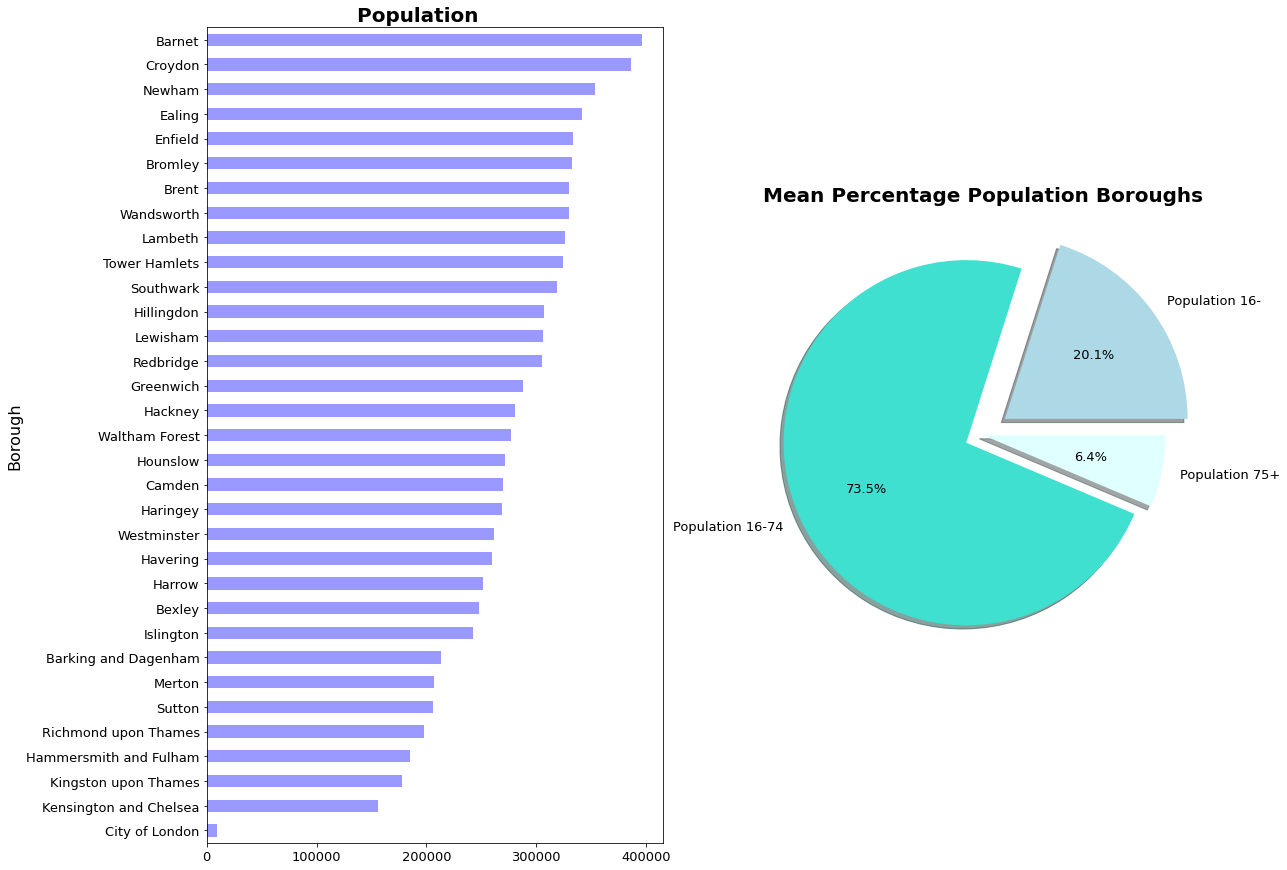

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 15))

Table1['Population'].sort_values().plot(kind='barh', color='b', alpha=0.4, ax=axes[0]);


pie_data=[Table1["Percentage of population 16-"].mean(),
          Table1["Percentage of population 16-74"].mean(),
          Table1["Percentage of population 75+"].mean()]

ind=['Population 16-', 'Population 16-74', 'Population 75+']
df_pie_data=pd.DataFrame(pie_data,columns=["Mean Percentage Population Boroughs"],index=ind)
df_pie_data=df_pie_data.round(2)

axes[1].pie(df_pie_data["Mean Percentage Population Boroughs"],labels=df_pie_data.index, explode=(0.15, 0.1, 0), 
        autopct='%1.1f%%',shadow=True, startangle=0,colors=['lightblue','turquoise','lightcyan']);

axes[0].set_title("Population     ",fontsize=20,fontweight='bold')
axes[0].set_ylabel("Borough",fontsize=16)
axes[0].set_xticks([0,100000,200000,300000,400000])
axes[1].set_title("Mean Percentage Population Boroughs",fontsize=20,fontweight='bold')


import matplotlib as mpl
mpl.rcParams['font.size'] = 13

### Crime Rate (per 1000)

In order to compare the 'Crime Rate (per 1000 residents)', a pie plot (*) is displayed to see which are the safest and most dangerous boroughs. As this plot is interactive, the 'Crime Rate (per 1000)' and the borough name are also shown. Furthermore, by clicking on the legend some of the boroughs can be taken off the plot. This is useful if we want to make smaller subgroup comparisons between the boroughs.

The boroughs with the highest crime rate are City of London and Westsminster with a value of 612 and 281.7, respectively. But what it is more important to highlight, is their big difference with respect to the next borough with the highest crime rate, which is Kensington and Chelsea, with a rate of 155.7. The safest boroughs are Richmond Upon Thames and Harrow. However, all the borrows except City of London have a low crime rate.

In [3]:
fig = px.pie(Table1, values=Table1['Crime Rate (per 1000)'], names=Table1.index,
             title='Crime Rate for the London Boroughs (per 1000)',color=Table1.index)
fig.update_traces(textposition='inside',textinfo='percent')

fig.show()

### Average employee and self-employee income, Employment Rate and Average Housing Price

The next thing to explore is the relation between the 'Average Employee Income' and the 'Average Self-Employee Income' with respect to the 'Employment Rate' and the 'Average Housing Price'. The expected result would be that as the 'Average Housing Price' increases, the 'Average Employee and Self-Employee Income' will increase. However, this is not the case as the correlation for these variables is nearly zero, shown in the plot below. 

The correlation coefficients of the 'Employment Rate' and the 'Average Employee and Self-Employee Income' are low, but higher than the other correlations. This was unexpected, nevertheless, it can be due to the outlier acting as a point of high leverage in this case.

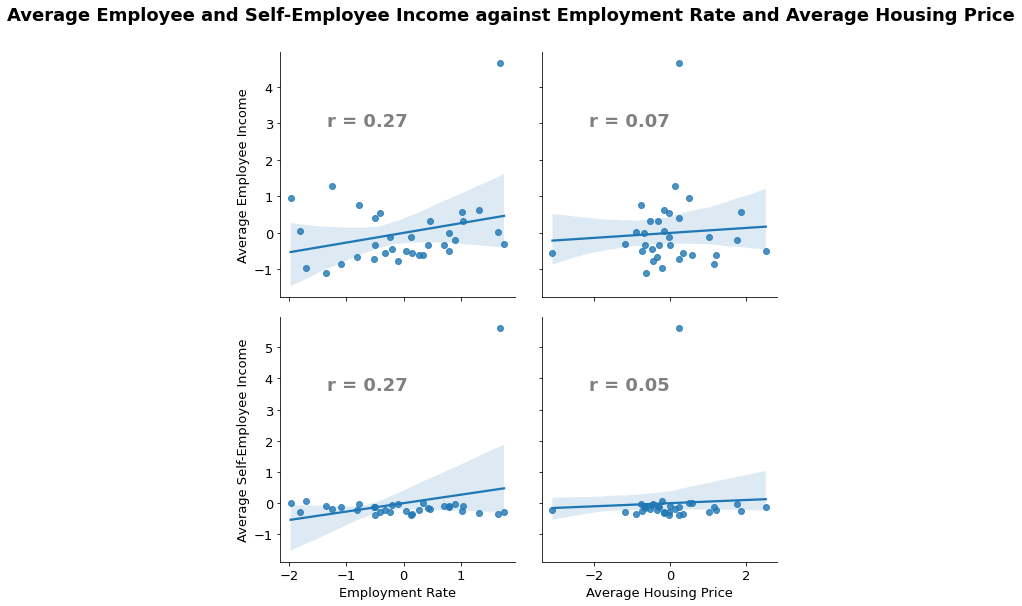

In [18]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .7), xycoords=ax.transAxes, fontweight='bold',fontsize=18,color='grey')

data = Table1.loc[:,["Average Employee Income", 'Average Self-Employee Income', "Employment Rate", "Average Housing Price"]]
data_sc=StandardScaler().fit_transform(data)
data_sc=pd.DataFrame(data_sc, columns=["Average Employee Income", 'Average Self-Employee Income', 
                                       "Employment Rate", "Average Housing Price"],index=Table1.index)

g = sns.PairGrid(data_sc, y_vars=["Average Employee Income",'Average Self-Employee Income'], 
                 x_vars=["Employment Rate", "Average Housing Price"], height=4)
g.map(sns.regplot)
g.fig.suptitle('Average Employee and Self-Employee Income against Employment Rate and Average Housing Price',
               fontsize=18,fontweight='bold',y=1.05);
g.map(corrfunc);

Moreover, it is of our interest to inspect further the contrast between the 'Average Employee Income' and the 'Average Self-Employee Income'. To that end, a kernel density estimate plot is presented below, in order to not only see the difference but also their respective distributions. From this plot, it can be observed that the 'Average Employee Income' on average tends to be higher than the' Average Self-Employee Income'. Nevertheless, the highest values are obtained by the 'Average Self-Employee Income'.

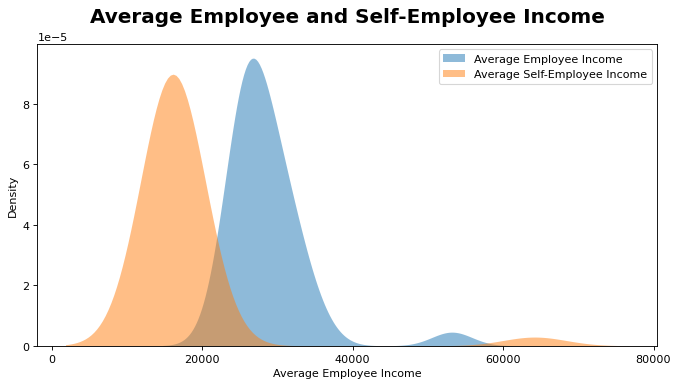

In [94]:
fig=plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(data=Table1["Average Employee Income"], label="Average Employee Income", fill=True, common_norm=False, 
            palette="crest", alpha=.5, linewidth=0)

sns.kdeplot(data=Table1["Average Self-Employee Income"], label="Average Self-Employee Income", fill=True, common_norm=False, 
            palette="crest",alpha=.5, linewidth=0)

plt.xticks([0,20000,40000,60000,80000])
plt.title("Average Employee and Self-Employee Income",fontsize=18,fontweight='bold',y=1.05)
plt.legend();

### Workday Population, Day Visitors, Density of the Population and Average Public Transport Accesibility Score

Finally to end analysing the features of __Table I__, let us consider the variables of 'Workday Population', 'Day Visitors', 'Density'(density of the population) and 'Average Public Transport Accesibility Score'. The first two variables are summed to create a new one called 'Day Population' and plotted in a map of the London boroughs. Similarly, a map is also displayed for the variable 'Density'. The first map shows high concentrations of people in the surrounding boroughs of the City of London, not including this one. However, in the second map the majority of population during the day is in the City of London and also in Westminster. 

It would also be of our interest to see if there is any correlation between the 'Average Public Transport Accesibility Score' and 'Day Visitors' or 'Density' variables. It can be seen from the scatterplots below that there is a moderately high positive correlation between these variables. Although from the plots it seems that the correlation with the 'Density' should be higher than that with the 'Day Population', when computing the correlation, this is not the case. Having a closer look it might be the outlier the one decreasing this correlation coefficient value.

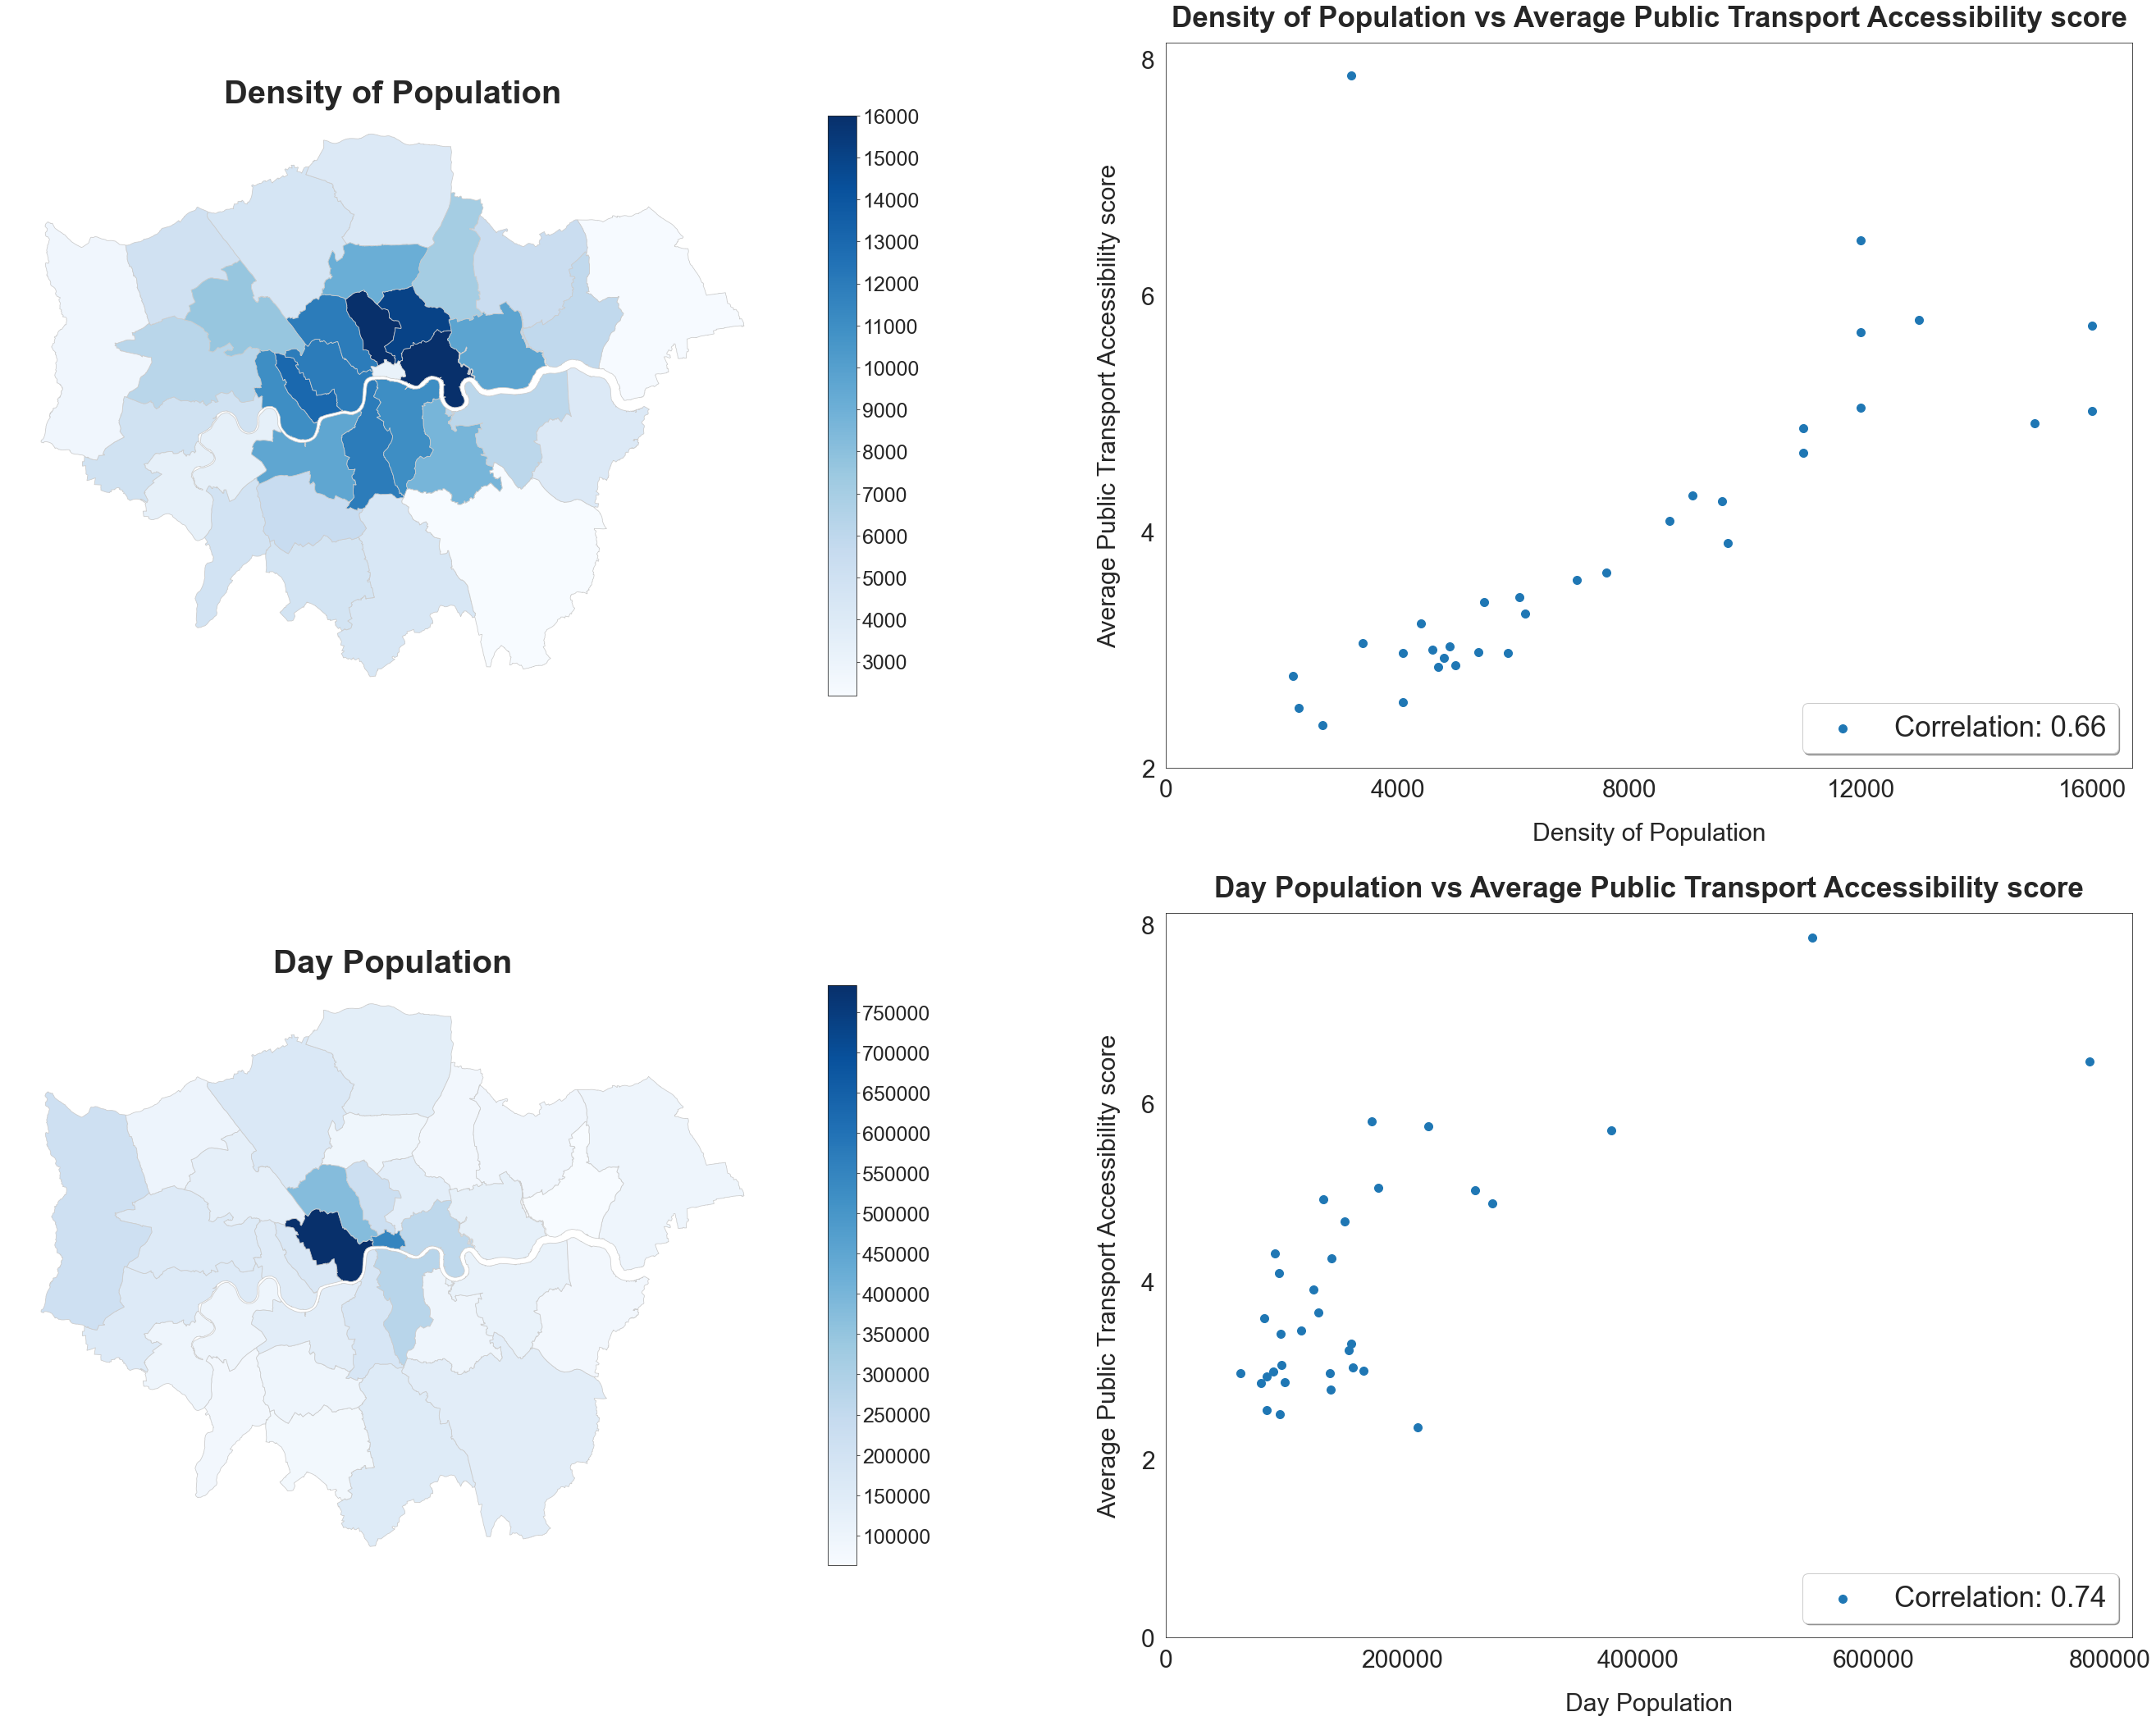

In [431]:
# Add a column to Table 1 which combines the Workday Population and the Day Visitors
Table1['Day Population'] = Table1.loc[:,['Workday Population','Day Visitors']].sum(axis=1)

map_figure = geopandas.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
map_figure = map_figure.set_index('NAME')
data = map_figure.join(Table1) 

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(40, 30));
data.plot(column='Density', cmap='Blues', linewidth=0.8, ax=axes[0,0], edgecolor='0.8',figsize=50)
data.plot(column='Day Population', cmap='Blues', linewidth=0.8, ax=axes[1,0], edgecolor='0.8',figsize=50)

axes[0,0].axis('off')
axes[1,0].axis('off')

axes[0,0].set_title('Density of Population', fontsize=40, fontweight='bold')
axes[1,0].set_title('Day Population', fontsize=40, fontweight='bold');

sm0 = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=min(Table1['Density']), vmax=max(Table1['Density'])))
sm1 = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=min(Table1['Day Population']), vmax=max(Table1['Day Population']))) 
colbar0=fig.colorbar(sm0,ax=axes[0,0],aspect=20,shrink=0.8)# ticks=[2200,4000,6000,8000,10000,12000,14000,16000])
colbar1=fig.colorbar(sm1,ax=axes[1,0],aspect=20,shrink=0.8) #ticks=[2200,4000,6000,8000,10000,12000,14000,16000])
colbar0.ax.locator_params(nbins=15)
colbar1.ax.locator_params(nbins=15)
colbar0.ax.tick_params(labelsize=25)
colbar1.ax.tick_params(labelsize=25)

axes[0,1].scatter(Table1['Density'], Table1['Average Public Transport Accessibility score'],alpha=1,s=100,
                  label='Correlation: '+ str(np.round(np.corrcoef(Table1['Density'],Table1['Average Public Transport Accessibility score'])[0,1], 2)))
axes[1,1].scatter(Table1['Day Population'], Table1['Average Public Transport Accessibility score'],alpha=1,s=100,
                  label='Correlation: '+ str(np.round(np.corrcoef(Table1['Day Population'],Table1['Average Public Transport Accessibility score'])[0,1], 2)));

plt.subplots_adjust(left=0, bottom=0, right=0.9, top=0.9)
axes[0,1].set_title('Density of Population vs Average Public Transport Accessibility score', fontsize=35, fontweight='bold',pad=20)
axes[1,1].set_title('Day Population vs Average Public Transport Accessibility score', fontsize=35, fontweight='bold',pad=20);

axes[0,1].set_xlabel('Density of Population', fontsize=30, labelpad=25)
axes[0,1].set_ylabel('Average Public Transport Accessibility score', fontsize=30,labelpad=25)
axes[1,1].set_xlabel('Day Population', fontsize=30, labelpad=25)
axes[1,1].set_ylabel('Average Public Transport Accessibility score', fontsize=30, labelpad=25);

axes[0,1].tick_params(axis='both', which='major', labelsize=30, width=2.5, length=10)
axes[1,1].tick_params(axis='both', which='major', labelsize=30, width=2.5, length=10)

axes[0,1].set_xticks([0,4000,8000,12000,16000])
axes[0,1].set_yticks([2,4,6,8])
axes[1,1].set_xticks([0,200000,400000,600000,800000])
axes[1,1].set_yticks([0,2,4,6,8]);

axes[0,1].legend(fontsize=35,loc='lower right',shadow=True,borderpad=0.4,fancybox=True)
axes[1,1].legend(fontsize=35,loc='lower right',shadow=True,borderpad=0.4,fancybox=True);


# Remove the column of Table 1 which combines the Workday Population and the Day Visitors:
Table1 = Table1.drop(columns=['Day Population'])

## Table II: Facilities of the Boroughs

__Table II__ comprises the facilities of the boroughs and it is not used during the clustering procedure in the Data Analysis Section below. Instead it is employed afterwards, once the boroughs are subgrouped in order to see possible potentialities of less developed boroughs which share similar characteristics to others with more facilities. As a preliminary analysis, we want to analyze the type and number of facilities in each borough and compare these with the rest of the boroughs. 

First, a barplot is drawn below in order to examine the number of venues across the boroughs. The 'Restaurants' and the 'Shops' are the venues with the highest count for most of the boroughs. The ones that have the largest number of facilities are Barking and Dagenham and Barnet. City of London, eventhough it is the richest, does not have the largest number of venues due to its small area. Waltham Forest and Wandsworth are the most disadvantageous in terms of number of facilities.   

Further, an interactive pie chart (*) of the facilities is plotted for each borough, to be able to determine the proportion that each venue represents in the corresponding borough. Running the first block of code after the barplot will display the pie charts of all the boroughs, but to avoid repetition, only the output of the next block of code will be shown, displaying the pie charts for the first two. They are interactive plots, hence, some of the facilities can be removed from the plot by mouse clicking the corresponding venue in the legend. These pie charts give us a good summary of the proportion of the type of facilities found in each borough and which venues are more representative in each one. Furthermore, it allow us to compare the venues of different boroughs.

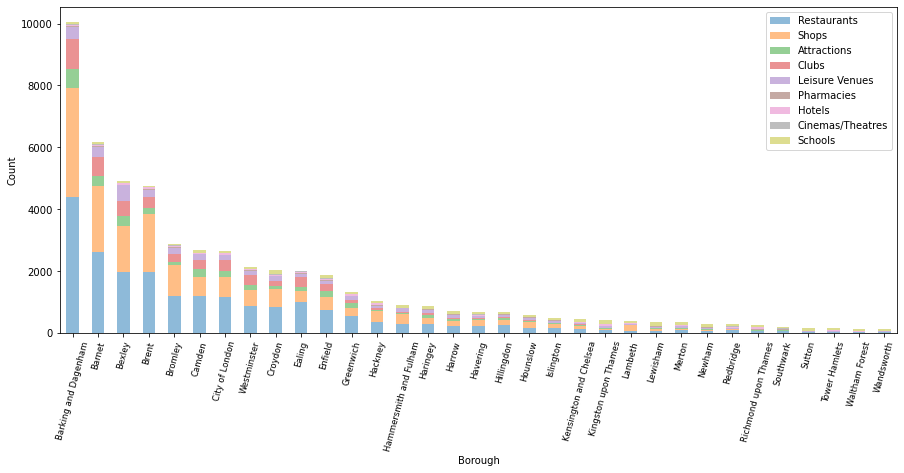

In [96]:
Table3=Table2.copy()
Table3['Sum'] = Table3.sum(axis=1)

fig, ax = plt.subplots(figsize=(15, 6))
Table3.sort_values(by='Sum', ascending=False).plot.bar(y=[0,1,2,3,4,5,6,7,8],stacked=True, 
                                                       edgecolor='none', alpha = 0.5,ax=ax);
ax.set_xticklabels(Table3.index,rotation=75, fontsize=8.5);
ax.set_ylabel('Count');

In [ ]:
labels = Table2.columns
ls=[x for x in range(0,33) if x % 2 == 0]

for i in ls:
    if i<32:
        fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])
        fig.add_trace(go.Pie(labels=labels, values=Table2.iloc[i], name=Table2.index[i],sort=False),1, 1)
        fig.add_trace(go.Pie(labels=labels, values=Table2.iloc[i+1], name=Table2.index[i+1],sort=False),1, 2)
        

        fig.update_traces(hole=.4, hoverinfo="label+percent")
        
        if i==0:
            fig.update_layout(
                title_text="Facilities in the Boroughs",
 
                annotations=[dict(text=Table2.index[i], x=0.15, y=0.5, font_size=8.2, showarrow=False),
                             dict(text=Table2.index[i+1], x=0.80, y=0.5, font_size=8.2, showarrow=False)])
        elif i==12:
            fig.update_layout(
                title_text="",
 
                annotations=[dict(text=Table2.index[i], x=0.19, y=0.5, font_size=8.2, showarrow=False),
                             dict(text=Table2.index[i+1], x=0.87, y=0.5, font_size=8.2, showarrow=False)])
        elif i==20:
            fig.update_layout(
                title_text="",
 
                annotations=[dict(text=Table2.index[i], x=0.15, y=0.5, font_size=8.2, showarrow=False),
                             dict(text=Table2.index[i+1], x=0.85, y=0.5, font_size=8.2, showarrow=False)])
        elif i==26:
            fig.update_layout(
                title_text="",
 
                annotations=[dict(text=Table2.index[i], x=0.19, y=0.5, font_size=8.2, showarrow=False),
                             dict(text=Table2.index[i+1], x=0.87, y=0.5, font_size=8.2, showarrow=False)])
        else:
            fig.update_layout(
                title_text="",

                annotations=[dict(text=Table2.index[i], x=0.19, y=0.5, font_size=8.2, showarrow=False),
                             dict(text=Table2.index[i+1], x=0.8, y=0.5, font_size=8.2, showarrow=False)])
        fig.show()
    
    else:
        fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])
        fig.add_trace(go.Pie(labels=labels, values=Table2.iloc[i], name=Table2.index[i],sort=False),1, 1)
        
        fig.update_traces(hole=.4, hoverinfo="label+percent")
        
        fig.update_layout(
            title_text="",

            annotations=[dict(text=Table2.index[i], x=0.18, y=0.5, font_size=8.2, showarrow=False)])
        fig.show()

In [6]:
labels = Table2.columns

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=Table2.iloc[0], name=Table2.index[0],sort=False),1, 1)
fig.add_trace(go.Pie(labels=labels, values=Table2.iloc[1], name=Table2.index[1]),1, 2)
        

fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="Facilities in the Boroughs",
    annotations=[dict(text=Table2.index[0], x=0.15, y=0.5, font_size=8.2, showarrow=False),
                 dict(text=Table2.index[1], x=0.8, y=0.5, font_size=8.2, showarrow=False)])

        
fig.show()

# Data Analysis: Clustering

Once the exploratory analysis of the data has been done, we will group the boroughs that share similar socio-economic characteristics (__Table1__). To be able to fulfil our goals, we use several clustering techniques. There are four main categories of clustering methods: partition-based, density-based, distribution-based and hierarchical. For this study, four different clustering algorithms are considered, one of each category to make our analysis more robust. In this way, the algorithms of $k$-means, Density-Based Spatial Clustering of Applications with Noise (DBSCAN), Gaussian mixture model (GMM) and Agglomerative Hierarchical clustering, are selected. The techniques are then evaluated and the best one is chosen to conclude the final grouping of the boroughs.

As seen above, __Table1__ has 14 variables and only 33 observations, this can result in having some redundacy between the information of the variables. Let us have a first inspection by looking at the correlation matrix plotted below. The matrix shows pair of data variables with high correlations. It can be inferred from this plot that some variables should be omitted before applying the algorithms.

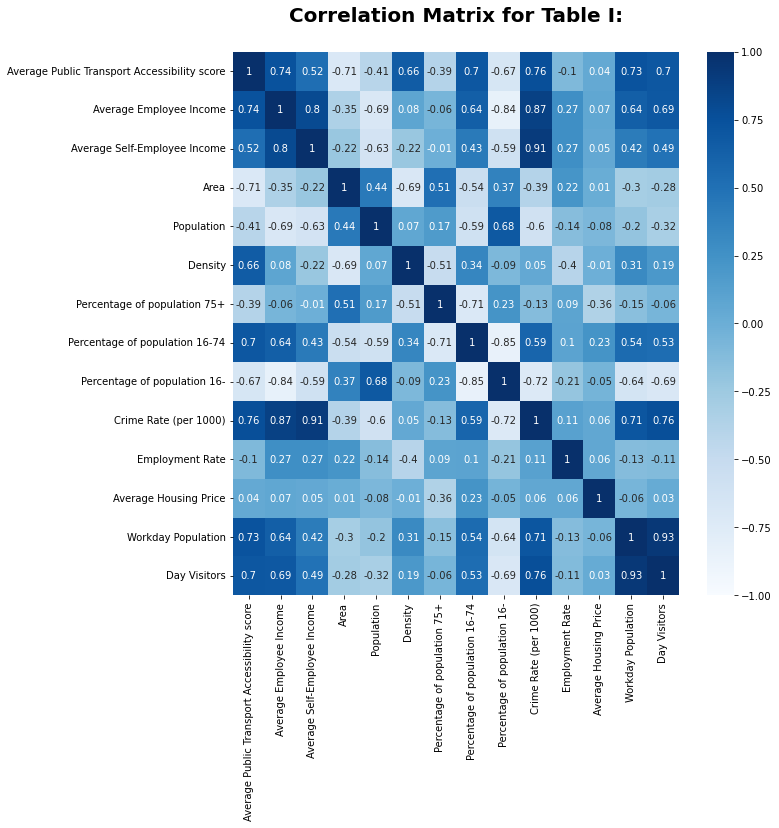

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix=Table1.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1,cmap='Blues')
ax.set_title('Correlation Matrix for Table I:',fontsize=20, fontweight='bold',pad=30)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Principal Component Analysis (PCA)

Although the omission of redundant variables can be done by variable selection, we choose to employ PCA. It is an unsupervised dimensionality reduction technique which projects each observation onto the first few principal components, trying to preserve as much variation of the data as possible. In order to select the number of principal components to be used, first we standardize the data to make it scale-free. Then we apply PCA to the whole data and determine the number of components that explain most of the variation of the data. It can be observed from the interactive plot below (*) that the first seven principal components explain approximately 97% of the total variation, which is more than adequate for our analysis.

In [26]:
# Standardize Table 1 before applying the methods and also the algorithms 
Table1_sc=StandardScaler().fit_transform(Table1)

mod = decomposition.TruncatedSVD(n_components=len(Table1.columns)-1)
PC=mod.fit_transform(Table1_sc)
px.area(x=range(1, len(Table1.columns)), y=np.cumsum(mod.explained_variance_ratio_), 
        labels={"x": "Number of Components", "y": "Explained Variance"},width=900, height=400,
        title="Ratio of total variance explained")

# Choose 7 components as they explain 97% of the total variance approximately

## Clustering Algorithms

The application of PCA before applying the clustering algorithms it is useful to avoid redundancies between the variables and to avoid possible correlations. However, there is some information lost in the process which can lead to worse results than by keeping all the variables when applying the algorithms. Due to this, we will apply each of the algorithms keeping the whole data but also after applying PCA with 7 components, to analyze if we can get similar results after the dimensionality reduction process.

### Tuning the parameters 

$k$-means, DBSCAN, GMM and Agglomerative Hierarchical Clustering are unsupervised algorithms, hence the true labels of the observations are unknown and we cannot tune the parameters by training the algorithm. For this reason, the parameters values are left to the subjective choice of the user. 

The Elbow Method has been used to choose the number of clusters for the $k$-means algorithm, which plots the number of clusters against the sum of squared distances from the point being clustered to its cluster center. In this case the chosen tuning parameter is the place of the 'elbow' in the plot. To choose the parameter (number of clusters) for the GMM method, we will use the BIC-Score method, which plots the BIC-Score against the number of clusters. It aims to minimize this score and is a good method as it avoids overfitting by including a penalizing term.

For DBSCAN the $k$-distance graph is used to determine the parameter $\epsilon$, which determines the maximum radius of each cluster. In this case, the parameter is chosen to be the 'elbow' part of the graph when plotting the index of the point against the distance of the point to its $k$-th nearest neighbour. In our case $k$ is chosen to be 2, as we want at least 2 points in each cluster. Finally, for hierarchical clustering, a dendogram is displayed using the Ward’s Minimum Variance linkage and the Euclidean distance to decide the cutting point which determines the number of clusters.

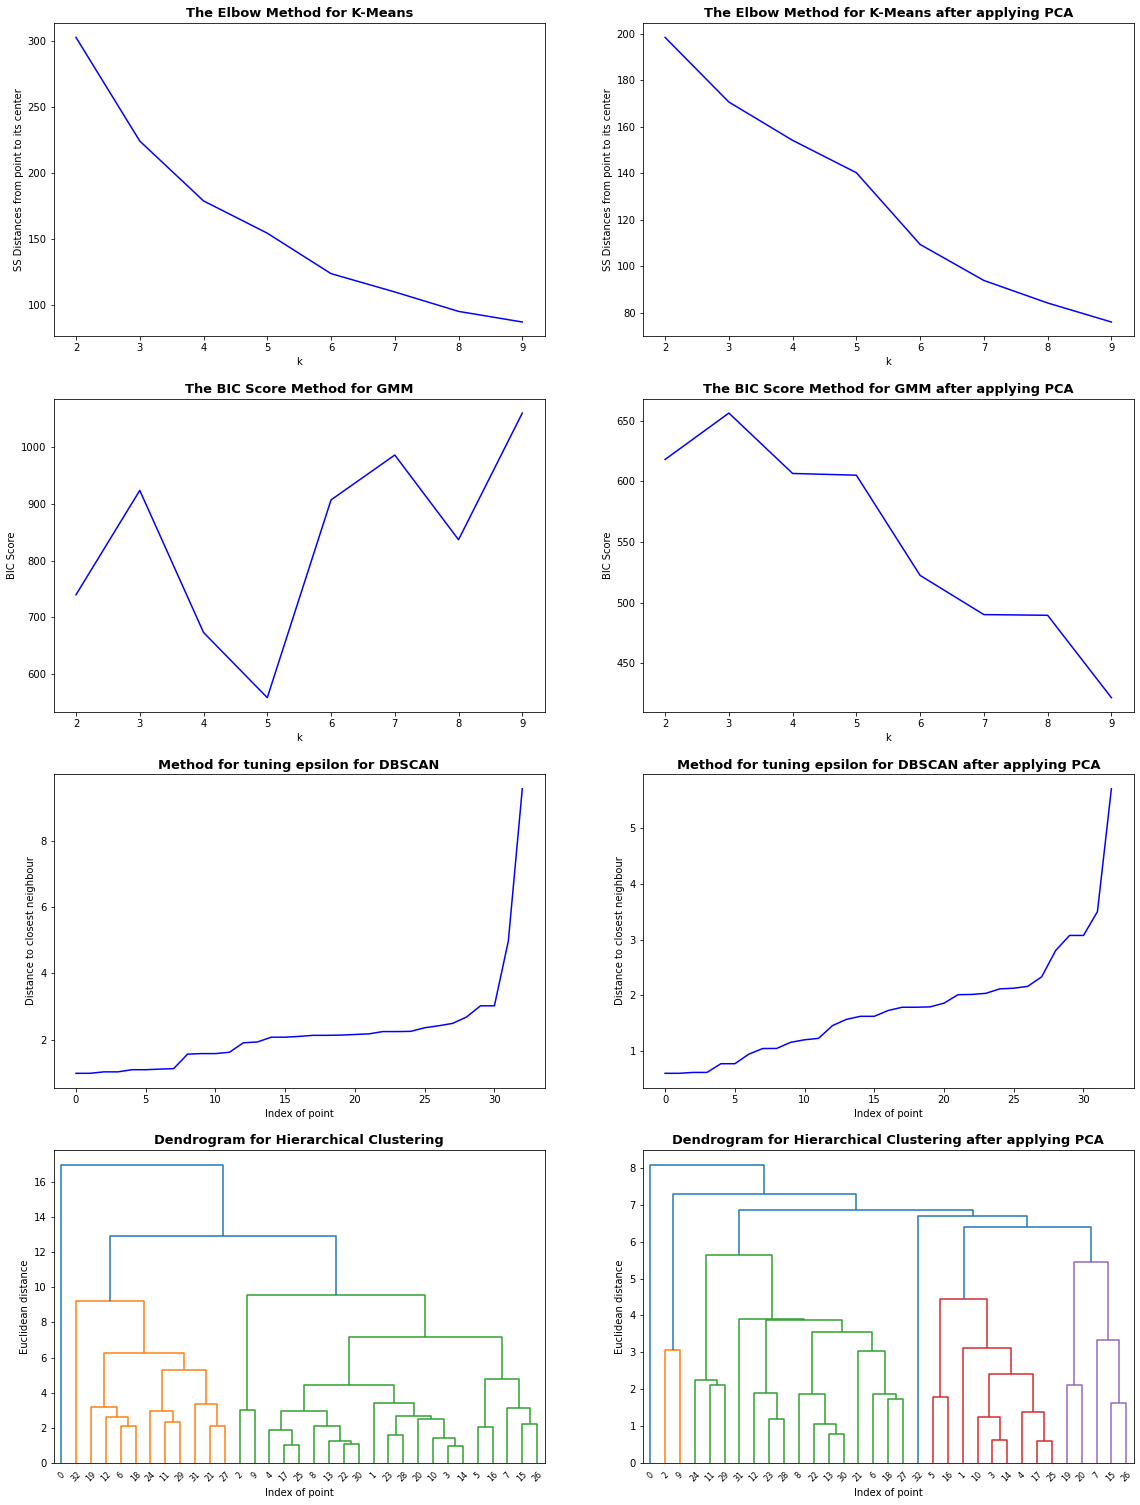

In [14]:
# Standardize Table 1 before applying the methods and also the algorithms 
Table1_sc=StandardScaler().fit_transform(Table1)

fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(15, 20));

PC=decomposition.TruncatedSVD(n_components=7).fit_transform(Table1_sc)
PC_sc= StandardScaler().fit_transform(PC)

# Choosing the optimal number of k for k-means and GMM
ssd = []
ssd_PCA=[]
BIC_score=[]
BIC_score_PCA=[]
K = range(2,10)
for k in K:
    kmeans = KMeans(init="random",n_clusters=k,n_init=10, max_iter=300,random_state=2).fit(Table1_sc)
    kmeans_PCA = KMeans(init="random",n_clusters=k,n_init=10, max_iter=300, random_state=2).fit(PC_sc)
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full', random_state=41).fit(Table1_sc)
    gmm_PCA = mixture.GaussianMixture(n_components=k, covariance_type='full', random_state=45).fit(PC_sc)
    
    ssd.append(kmeans.inertia_)
    ssd_PCA.append(kmeans_PCA.inertia_)
    BIC_score.append(gmm.bic(Table1_sc))
    BIC_score_PCA.append(gmm_PCA.bic(PC_sc))

# Choosing optimal epsilon with MinPts=2 for DBSCAN
# We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. 
# The point itself is included in n_neighbors

neighbours = NearestNeighbors(n_neighbors=2).fit(Table1_sc)
neighbours_PCA = NearestNeighbors(n_neighbors=2).fit(PC_sc)
distance, index = neighbours.kneighbors(Table1_sc)
distance_PCA, index_PCA = neighbours_PCA.kneighbors(PC_sc)
distance = np.sort(distance, axis=0)[:,1]
distance_PCA = np.sort(distance_PCA, axis=0)[:,1]

axes[0,0].plot(K, ssd, 'b-')
axes[0,1].plot(K, ssd_PCA, 'b-')
axes[1,0].plot(K,BIC_score, 'b-')
axes[1,1].plot(K,BIC_score_PCA, 'b-')
axes[2,0].plot(distance, 'b-')
axes[2,1].plot(distance_PCA, 'b-')
dend = dendrogram(linkage(Table1_sc, method = 'ward'),ax=axes[3,0])
dend_PCA = dendrogram(linkage(PC_sc, method = 'ward'),ax=axes[3,1])

axes[0,0].set_xlabel('k')
axes[0,1].set_xlabel('k')
axes[1,0].set_xlabel('k')
axes[1,1].set_xlabel('k')
axes[2,0].set_xlabel('Index of point')
axes[2,1].set_xlabel('Index of point')
axes[3,0].set_xlabel('Index of point')
axes[3,1].set_xlabel('Index of point')

axes[0,0].set_ylabel('SS Distances from point to its center')
axes[0,1].set_ylabel('SS Distances from point to its center')
axes[1,0].set_ylabel('BIC Score')
axes[1,1].set_ylabel('BIC Score')
axes[2,0].set_ylabel('Distance to closest neighbour')
axes[2,1].set_ylabel('Distance to closest neighbour')
axes[3,0].set_ylabel('Euclidean distance')
axes[3,1].set_ylabel('Euclidean distance')

axes[0,0].set_title('The Elbow Method for K-Means',fontsize=13, fontweight='bold',pad=6)
axes[0,1].set_title('The Elbow Method for K-Means after applying PCA',fontsize=13, fontweight='bold',pad=6)
axes[1,0].set_title('The BIC Score Method for GMM',fontsize=13, fontweight='bold',pad=6)
axes[1,1].set_title('The BIC Score Method for GMM after applying PCA',fontsize=13, fontweight='bold',pad=6)
axes[2,0].set_title('Method for tuning epsilon for DBSCAN',fontsize=13, fontweight='bold',pad=6)
axes[2,1].set_title('Method for tuning epsilon for DBSCAN after applying PCA',fontsize=13, fontweight='bold',pad=6)
axes[3,0].set_title('Dendrogram for Hierarchical Clustering',fontsize=13, fontweight='bold',pad=6)
axes[3,1].set_title('Dendrogram for Hierarchical Clustering after applying PCA',fontsize=13, fontweight='bold',pad=6)


plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

The implementation of the tuning methods is displayed in the plots above. The number of clusters $k$ ranges from 2 to 9 for the $k$-means and GMM algorithms. When selecting the parameters of the algorithms, we need to take into account that although having more specific subgroups is positive, too many will make single-observation clusters and this is undesirable in our study. In this way, for $k$-means, $k$-means after PCA, GMM, GMM after PCA, DBSCAN, DBSCAN after PCA, Hierarchical Clustering and Hierarchical Clustering after PCA the parameters are chosen to be 6, 6, 5, 6, 3.5, 2, 4, and 5, respectively.

### Implementation of the Algorithms

In order to have a visualization of the performance of the different algorithms, PCA with 2 components is applied to the entire data and the labels obtained for each of the algorithms (k-means, k-means after PCA, GMM, GMM after PCA, DBSCAN, DBSCAN after PCA, Hierarchical Clustering and Hierarchical Clustering after PCA) are applied to the points of these plots. Before implementing the algorithms and PCA the data is standardized. 

The plots of the algorithms after applying PCA with 7 components do not show a nice cluster separation, with many points overlapping, being the Hierarchical algorithm the best in this case. When using all the variables to predict the labels, GMM stands out from the rest as it is able to display clearly separable clusters with no overlapping. This is expected as when the number of clusters $k=5$, the BIC-Score is very low, clearly indicating that it is the optimal value for the tuning parameter. DBSCAN was also able to achieve well separated clusters, however it was an easier task because it only found two clusters (the points labelled with as -1 are outliers).  

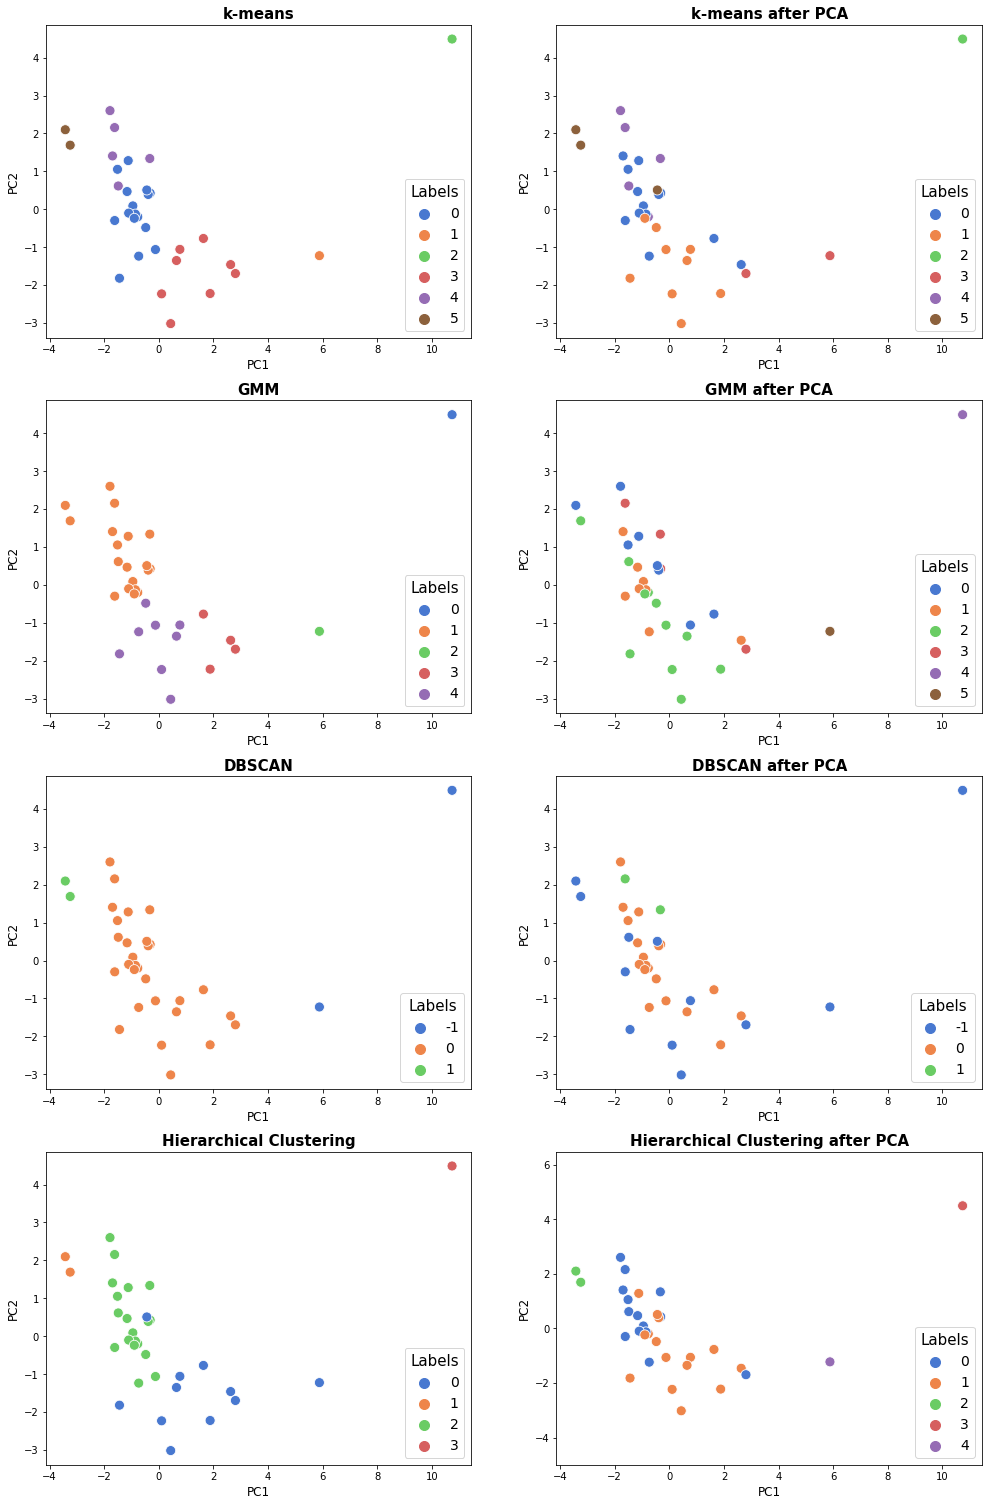

In [15]:
# Standardize Table 1 before applying the methods and also the algorithms 
Table1_sc=StandardScaler().fit_transform(Table1)

PC=decomposition.TruncatedSVD(n_components=7).fit_transform(Table1_sc)
PC_sc= StandardScaler().fit_transform(PC)
PC2_all_variables=decomposition.TruncatedSVD(n_components=2).fit_transform(Table1_sc)


# Methods:
k_mean = KMeans(init="random", n_clusters=6, n_init=50, max_iter=500, random_state=3).fit(Table1_sc)
k_mean_PCA = KMeans(init="random", n_clusters=6, n_init=50, max_iter=500, random_state=4).fit(PC_sc)
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full', random_state=41).fit(Table1_sc)
gmm_PCA = mixture.GaussianMixture(n_components=6, covariance_type='full', random_state=42).fit(PC_sc)
dbscan = DBSCAN(eps = 3.5, min_samples = 2).fit(Table1_sc) 
dbscan_PCA = DBSCAN(eps = 2, min_samples = 2).fit(PC_sc)
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit(Table1_sc)
hierarchical_PCA = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(PC_sc)

# Create a data frame with the Principal Components and the labels when using all variables:
df1 = pd.DataFrame(PC2_all_variables)
df1["k-means labels"] = k_mean.labels_
df1["k-means (PCA) labels"] =  k_mean_PCA.labels_
df1["GMM labels"]=gmm.predict(Table1_sc)
df1["GMM (PCA) labels"]=gmm_PCA.predict(PC_sc)
df1["DBSCAN labels"] = dbscan.labels_
df1["DBSCAN (PCA) labels"] = dbscan_PCA.labels_
df1["Hierarch. labels"]=hierarchical.labels_
df1["Hierarch. (PCA) labels"]=hierarchical_PCA.labels_
df1.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)

fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(13, 20));
method_labels=["k-means labels", "k-means (PCA) labels", "GMM labels", "GMM (PCA) labels", "DBSCAN labels", 
               "DBSCAN (PCA) labels", "Hierarch. labels", "Hierarch. (PCA) labels"]

titles=['k-means', 'k-means after PCA', 'GMM', 'GMM after PCA', 'DBSCAN', 'DBSCAN after PCA', 'Hierarchical Clustering', 
        'Hierarchical Clustering after PCA']


row_index=[0,0,1,1,2,2,3,3]
column_index=[0,1,0,1,0,1,0,1]
for i, j, column, t in zip(row_index, column_index, method_labels, titles):
    sns.scatterplot(x="PC1", y="PC2", palette="muted" ,hue=column, marker="o", alpha=1, data=df1, ax=axes[i,j],
                    size=column, sizes=(100, 100),legend='auto') 
    plt.axis('equal')
    axes[i,j].set_xlabel("PC1",fontsize=12)
    axes[i,j].set_ylabel("PC2",fontsize=12)
    axes[i,j].set_title(t,fontsize=15, fontweight='bold',pad=6)
    axes[i,j].legend(loc='lower right', title='Labels',fontsize=14,title_fontsize=15) 

    
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)



### Metrics and Evaluation of the Algorithms 

In order to evaluate the performance of the algorithms for this unsupervised case, three metrics are considered:

- __Davies-Bouldin Score__: it is the average similarity measure of each cluster with its most similar cluster, where similarity in this case is defined as the ratio between inter-cluster and intra-cluster distances. Clusters which are more dense and well separated from other clusters have better scores. Lower values of this score imply better performance.


- __Calinski-Harabasz Index__: compares the distance of cluster points to their centroid and the distance of these centroids to the global centroid. Higher values of this index imply the clusters are dense and well separated.


- __Silhouette Score__: it is the difference between the mean intra-cluster distance and the mean nearest-cluster distance divided by the maximum of these distances. Values close to 1 are best, values of 0 indicate the presence of overlapping clusters and -1 is the worst value.


In [31]:
method_labels=["k-means labels", "k-means (PCA) labels", "GMM labels", "GMM (PCA) labels", "DBSCAN labels", 
               "DBSCAN (PCA) labels", "Hierarch. labels", "Hierarch. (PCA) labels"]
Davies_Bouldin_Score=[]
Calinski_Harabasz_Score=[]
Silhouette_Score=[]

for label in method_labels:
    Davies_Bouldin_Score.append(round(davies_bouldin_score(Table1_sc, df1[label]),2))
    Calinski_Harabasz_Score.append(round(metrics.calinski_harabasz_score(Table1_sc, df1[label]),2))
    Silhouette_Score.append(round(metrics.silhouette_score(Table1_sc, df1[label], metric='euclidean'),2))
    
Methods=['k-means', 'k-means after PCA', 'GMM', 'GMM after PCA', 'DBSCAN', 'DBSCAN after PCA', 'Hierarchical Clust.',
         'Hierarchical Clust. after PCA']

fig = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Davies Bouldin Score','Calinski Harabasz Score', 
                                                   'Silhouette Score']),
                 cells=dict(values=[Methods, Davies_Bouldin_Score, Calinski_Harabasz_Score, Silhouette_Score]))
                     ])
fig.update_layout(title="Algorithm's Metrics Table", height=400)
fig.show()

By inspecting the interactive table above (*), it can be inferred that the best score with respect to the metrics Davies Bouldin Score and Silhouette Score is achieved by DBSCAN. While $k$-means obtained the best Calinski Harabasz Score. The good performance by the DBSCAN algorithm can be explained by the fact that it is only able to find 2 clusters, hence the clusters were well separated. However, we would like to have different subgroups of boroughs and not just a big one containing nearly all of them.

Although the performance after applying PCA with 7 components drops with respect to applying the algorithms on the entire data set, this drop is not significant for most of the algorithms considering that half of the variables are not included in the model.

A decision must be made with respect to which algorithm to select when grouping the boroughs. Although DBSCAN seems to have the best performance as stated above, to increase the number of subgroups, $k$-means is chosen as it is the next best performing algorithm and it is able to divide the data into 5 subgroups. 

### The 'Best' Algorithm (k-means)

The labels obtained after applying the $k$-means to the whole data are displayed in the geographical map below in order to more clearly see which boroughs are grouped together. From the map, we can see how City of London and Westminster are not grouped with any other borough, they are the richest ones and do not even share similar characteristics between them. The boroughs surrounding the City of London are clustered together. Similarly, the outskirt boroughs are grouped together. It is curious to see how boroughs that are next to each other share similar characteristics and are clustered together.

Our main interest for this study was to see possible potentialities of less developed boroughs when comparing them with other boroughs belonging to the same group. Hence, the facilities of the clustered together boroughs are displayed in the data frames below. It can already be seen from the data frames that there are bussiness and growth opportunities for boroughs with greater capacity of development by considering their similarity to boroughs with the same label. But let us take a closer look in the next plot. 

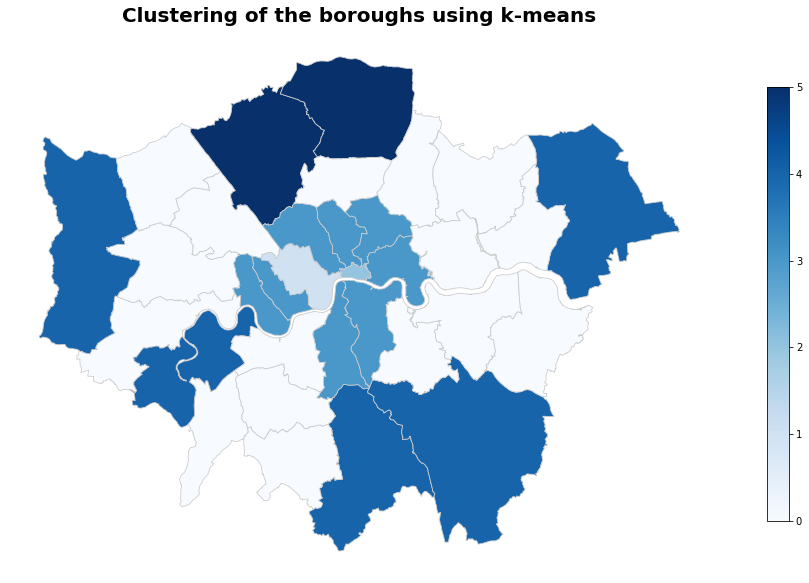

Restaurants  Shops  Attractions  Clubs  Leisure Venues  \
Borough                                                                        
Barking and Dagenham           17      8            6      0              16   
Bexley                         14      1           12      0              18   
Brent                        1963   1495          329    485             503   
Ealing                        224    193           25     25              66   
Greenwich                     301    184           91     53             117   
Haringey                      168    172           31     36              70   
Harrow                         80     32            9      2              18   
Hounslow                      341    349           63     44              86   
Kingston upon Thames           57     16            8      2              16   
Lewisham                      222    165           60     43              92   
Merton                        152    128           22     31              59   
Newham                        121     89           49     21              48   
Redbridge                      58     15           12      2              20   
Sutton                         14      6           22      0              12   
Waltham Forest                 54     42           18      7              51   
Wandsworth                    820    613           66    182             154   

                      Pharmacies  Hotels  Cinemas/Theatres  Schools  label  
Borough                                                                     
Barking and Dagenham           6       1                 0       62      0  
Bexley                         7      14                 1       81      0  
Brent                         11      50                 4       84      0  
Ealing                        17      42                 5       83      0  
Greenwich                     16      16                 1       83      0  
Haringey                      19       9                 8       78      0  
Harrow                        20      38                 9       65      0  
Hounslow                      16      50                 1       79      0  
Kingston upon Thames          11      27                 6       47      0  
Lewisham                      13      20                 1       84      0  
Merton                         7       8                 0       67      0  
Newham                         3      31                 0       83      0  
Redbridge                     16      50                 2       75      0  
Sutton                         6      19                 4       59      0  
Waltham Forest                11      11                 3       81      0  
Wandsworth                    13      33                 7      134      0

Restaurants  Shops  Attractions  Clubs  Leisure Venues  \
Borough                                                               
Westminster         4380   3541          611    959             389   

             Pharmacies  Hotels  Cinemas/Theatres  Schools  label  
Borough                                                            
Westminster          34      50                25       54      1

Restaurants  Shops  Attractions  Clubs  Leisure Venues  \
Borough                                                                  
City of London          985    364          130    337              72   

                Pharmacies  Hotels  Cinemas/Theatres  Schools  label  
Borough                                                               
City of London          40      50                19        6      2

Restaurants  Shops  Attractions  Clubs  \
Borough                                                          
Camden                         2598   2153          314    626   
Hackney                         854    517          184    322   
Hammersmith and Fulham         1183   1021           97    253   
Islington                      1170    643          172    364   
Kensington and Chelsea         1955   1877          210    357   
Lambeth                        1203    589          261    313   
Southwark                       537    281          134    121   
Tower Hamlets                   747    421          191    212   

                        Leisure Venues  Pharmacies  Hotels  Cinemas/Theatres  \
Borough                                                                        
Camden                             304          38      50                18   
Hackney                            121          21      32                 4   
Hammersmith and Fulham             195          17      50                10   
Islington                          155          17      50                 4   
Kensington and Chelsea             222          34      50                10   
Lambeth                            175          16      32                 4   
Southwark                          103          24      50                 6   
Tower Hamlets                      120          12      50                 8   

                        Schools  label  
Borough                                 
Camden                       84      3  
Hackney                      71      3  
Hammersmith and Fulham       48      3  
Islington                    56      3  
Kensington and Chelsea       33      3  
Lambeth                      81      3  
Southwark                    71      3  
Tower Hamlets                98      3

Restaurants  Shops  Attractions  Clubs  Leisure Venues  \
Borough                                                                        
Bromley                        99     31           30      9              53   
Croydon                        95     37           24     11              44   
Havering                       11      4            2      0              10   
Hillingdon                     75    174            7      3              23   
Richmond upon Thames          269    132           65     31              83   

                      Pharmacies  Hotels  Cinemas/Theatres  Schools  label  
Borough                                                                     
Bromley                        7      10                 6      114      4  
Croydon                       20      50                 6      115      4  
Havering                      10      30                 6       53      4  
Hillingdon                     7      16                 4       89      4  
Richmond upon Thames          14      20                 1       51      4

Restaurants  Shops  Attractions  Clubs  Leisure Venues  Pharmacies  \
Borough                                                                       
Barnet           300    300           42     43             107           4   
Enfield           71     68           11      7              43          12   

         Hotels  Cinemas/Theatres  Schools  label  
Borough                                            
Barnet        3                 0      112      5  
Enfield      13                 1      135      5

In [95]:
Table3=Table2.copy()
df2=pd.DataFrame(k_mean.labels_, index=Table1.index, columns=['label'])
Table3=Table3.join(df2)

map_figure = geopandas.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
map_figure = map_figure.set_index('NAME')
data = map_figure.join(Table3) 

fig, ax = plt.subplots(figsize=(20, 10));
data.plot(column='label', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',figsize=50)

ax.axis('off')
ax.set_title('Clustering of the boroughs using k-means', fontsize=20, fontweight='bold', pad=10)
sm0 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(Table3['label']), vmax=max(Table3['label'])))
colbar0=fig.colorbar(sm0,ax=ax,aspect=20,shrink=0.8)
plt.show()

display(Table3[Table3['label']==0])
display(Table3[Table3['label']==1])
display(Table3[Table3['label']==2])
display(Table3[Table3['label']==3])
display(Table3[Table3['label']==4])
display(Table3[Table3['label']==5])

# autumn, Blues, summer

In the plots below the number and type of facilities is represented for grouped together boroughs. This plots give us a clearer picture of the potentialities of the different boroughs. In the first plot, Brent and Wandsworth are the boroughs with the greatest number of facilities and the rest of the boroughs belonging to this cluster can have large improvements, especially Sutton and Barking and Dagenham. The plots for Cluster 1 and Cluster 2 do not provide us much information other than that City of London and Westminster seem to be very different between them and with respect to the rest of the boroughs. Cluster 3 contains the boroughs which are in the center surrounding City of London and it can be seen that further improvement can be made. The last two plots are the ones for the boundary boroughs, these are less developed than other more central boroughs and hence, there are unlimited opportunities of development.

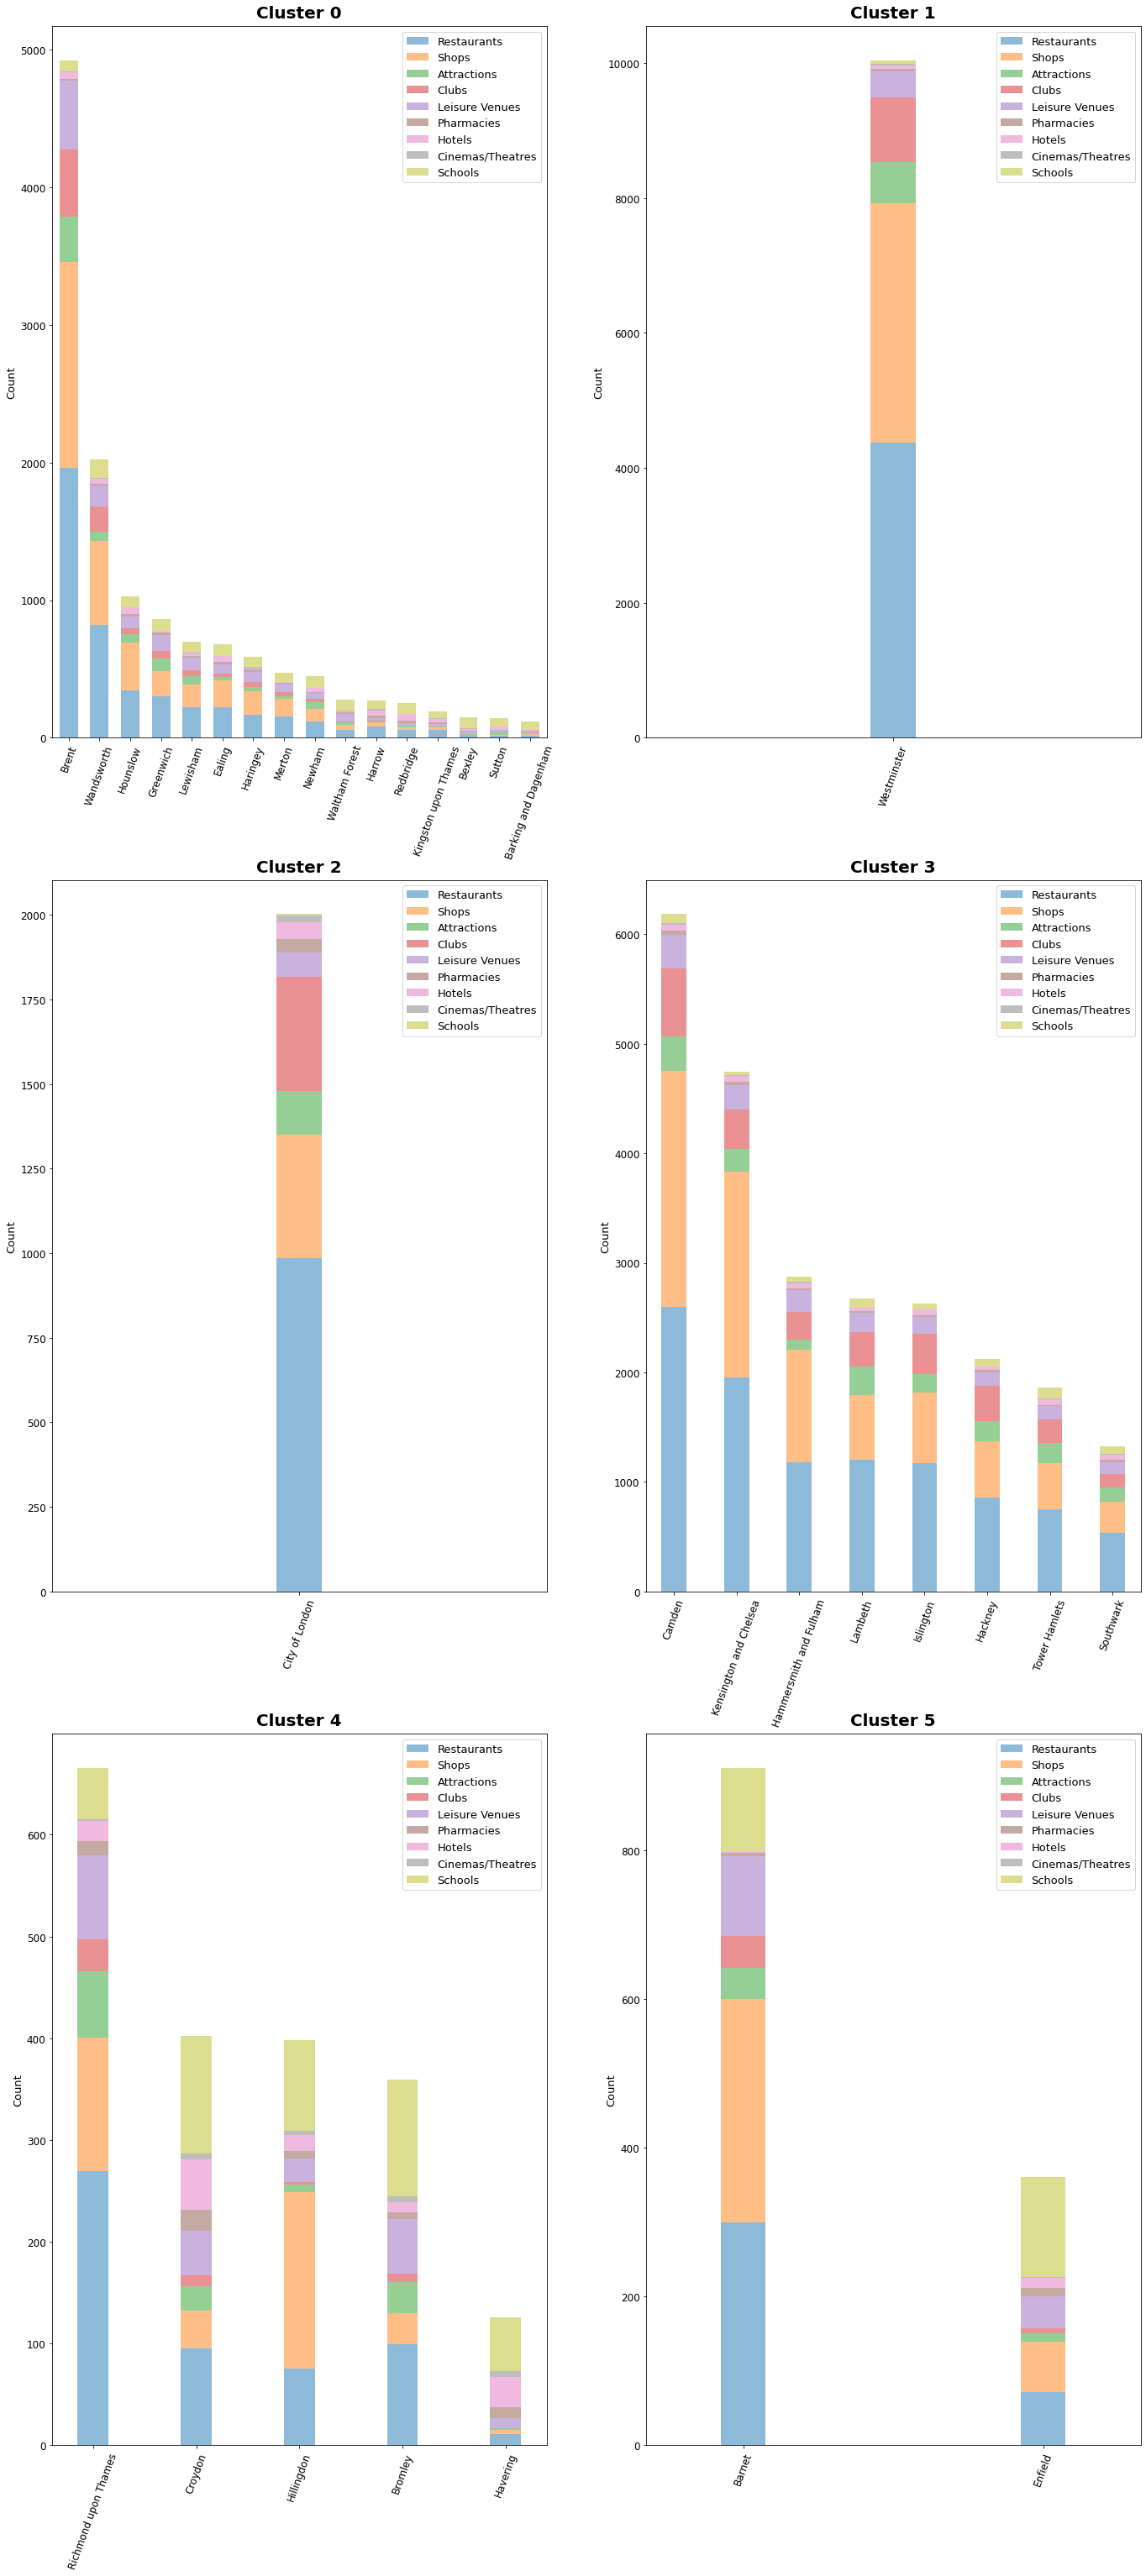

In [29]:
Table3['Sum'] = Table3.sum(axis=1)

fig, axes = plt.subplots(ncols=2, nrows=3,figsize=(18, 40))

rows=[0,0,1,1,2,2]
columns=[0,1,0,1,0,1]
widths=[0.6,0.05,0.05,0.4,0.3,0.15]
for i,r,c, width in zip(range(0,6), rows, columns,widths):
    
    Table3[Table3['label']==i].sort_values(by='Sum', ascending=False).plot.bar(y=[0,1,2,3,4,5,6,7,8],stacked=True, 
                                                                               edgecolor='none', alpha = 0.5, ax=axes[r,c],
                                                                               width=width)
    
    axes[r,c].set_ylabel('Count', fontsize=13)
    axes[r,c].set_title('Cluster '+str(i), fontsize=20, fontweight='bold', pad=10)
    axes[r,c].tick_params(axis='x', labelrotation=70,labelsize=12)
    axes[r,c].set_xlabel('')
    axes[r,c].legend(fontsize=13, loc='upper right')
    axes[r,c].tick_params(axis='y', labelsize=12)
    
    
       
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Conclusion

In this study, through data collection, data cleaning and the application of clustering algorithms, it has been possible to compare London boroughs and their facilities. Considering that the $k$-means algorithm is the most appropriate, we managed to subgroup the boroughs according to their socio-economic characteristics. In this way, potentialities of the less developed boroughs of each cluster can be reflected. From this, it can be concluded:
  - City of London and Westminster form two separate groups since their socio-economic situation is very different between them and from the rest of the boroughs. They are the most developed boroughs in terms of facilities and services, given their reduced size; and they are the most central.
  
  
  - Boroughs next to one another tend to have similar characteristics and hence they are clustered together.
  
  
  - The central boroughs surrounding City of London have the potentiality of becoming as developed as Westminster by their size and location. Furthermore there are large differences between the boroughs belonging to this cluster and hence, further growth of the boroughs with greater capacity for development should be expected.
  
  
  - The boroughs located on the outskirts are less developed than the rest in terms of facilities and services, however they provide affordable housing and have great growth potential.
  

Although the study is focused on specific variables and data that can help people or entities make decisions depending on the purposes they seek, I would have liked to analyze variables and/or data that could also yield an "emotional" or "vital" assessment of the neighborhoods that could provide a less utilitarian vision and more associated with the maxim that Montaigne said, "It is fruition, and not possession, that renders us happy".